## Some information about the different campaigns:

`EDAW` == 'Eating Disorders Awareness Week'. Global campaign that occurs annually, at the end of February/beginning of March. Aim is to raise awareness of the pain and suffering caused by eating disorders. Main charity in the UK that drives EDAW each year is Beat Eating Disorders. Other major organisations globally include NEDA (National Eating Disorders Association) - US, and NEDIC (National Eating Disorders Information Centre) - Canada.

`MHAW` == 'Mental Health Awareness Week'. UK's general Mental Health campaign that occurs annually, in mid-May. Not to be confused with other similar awarenes weeks such as Mental Illness Awareness Week (October, and global).

`UMHD` == 'Univeristy Mental Health Day'. An annual campaign led by the UK's student Mental Health Charity, Student Minds. Occurs in March. The campaign's aim is to raise awareness of the mental health of students studying in the UK.

`OCD Awareness Week` == global campaign that occurs annually, in the second week of October, to raise awareness of Obsessive Compulsive Disorder.

In [1]:
import numpy as np
import pandas as pd
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

C:\Users\aryan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
EDAW = pd.read_csv('EDAW.csv')
MHAW = pd.read_csv('MHAW.csv')
OCD = pd.read_csv('OCD.csv')
UMHD = pd.read_csv('UMHD.csv')

### EDAW Tweets

In [3]:
EDAW.head()

Unnamed: 0                       Date                   ID  \
0           0  2023-03-15 23:28:12+00:00  1636147315168927744   
1           1  2023-03-15 23:24:30+00:00  1636146382770966528   
2           2  2023-03-15 23:20:51+00:00  1636145465111752704   
3           3  2023-03-15 22:51:55+00:00  1636138183808393216   
4           4  2023-03-15 22:25:12+00:00  1636131460401725441   

                                                 url      username  \
0  https://twitter.com/HibaJebeile/status/1636147...   HibaJebeile   
1  https://twitter.com/Bfoundation/status/1636146...   Bfoundation   
2  https://twitter.com/EdawIhap/status/1636145465...      EdawIhap   
3  https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   
4  https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   

               source                 location  \
0     Twitter Web App  Sydney, New South Wales   
1     Twitter Web App                Australia   
2     Twitter Web App                      NaN   
3  Twitter for iPhone              Lincoln, NE   
4  Twitter for iPhone              Lincoln, NE   

                                               tweet  num_of_likes  num_of_rt  \
0  Grateful to be working with a fantastic group ...            19          4   
1  In this #podcast episode, we chat to Dr Beth S...             1          1   
2   @JTRIII3 @_AndrewCallahan Another sulky Pats fan             1          0   
3  This draft was God awful, and it was obvious f...             0          0   
4  @miketankerr Or even better, it’s not a separa...             0          0   

   followers  replies  
0       1552        1  
1      36483        0  
2          1        0  
3         90        0  
4         90        0

In [4]:
EDAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146394 entries, 0 to 146393
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    146394 non-null  int64 
 1   Date          146394 non-null  object
 2   ID            146394 non-null  int64 
 3   url           146394 non-null  object
 4   username      146394 non-null  object
 5   source        146394 non-null  object
 6   location      127014 non-null  object
 7   tweet         146394 non-null  object
 8   num_of_likes  146394 non-null  int64 
 9   num_of_rt     146394 non-null  int64 
 10  followers     146394 non-null  int64 
 11  replies       146394 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 13.4+ MB


In [5]:
EDAW.isnull().sum()  #locations are missing, but it's not a important feature so we ignore it or change the missing values into NAN or unknown.

Unnamed: 0          0
Date                0
ID                  0
url                 0
username            0
source              0
location        19380
tweet               0
num_of_likes        0
num_of_rt           0
followers           0
replies             0
dtype: int64

In [6]:
EDAW.duplicated().sum()

0

In [7]:
EDAW.drop(columns=['Unnamed: 0'], inplace=True) # Dropping the Unnamed:0 column from the dataset
EDAW.head()

Date                   ID  \
0  2023-03-15 23:28:12+00:00  1636147315168927744   
1  2023-03-15 23:24:30+00:00  1636146382770966528   
2  2023-03-15 23:20:51+00:00  1636145465111752704   
3  2023-03-15 22:51:55+00:00  1636138183808393216   
4  2023-03-15 22:25:12+00:00  1636131460401725441   

                                                 url      username  \
0  https://twitter.com/HibaJebeile/status/1636147...   HibaJebeile   
1  https://twitter.com/Bfoundation/status/1636146...   Bfoundation   
2  https://twitter.com/EdawIhap/status/1636145465...      EdawIhap   
3  https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   
4  https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   

               source                 location  \
0     Twitter Web App  Sydney, New South Wales   
1     Twitter Web App                Australia   
2     Twitter Web App                      NaN   
3  Twitter for iPhone              Lincoln, NE   
4  Twitter for iPhone              Lincoln, NE   

                                               tweet  num_of_likes  num_of_rt  \
0  Grateful to be working with a fantastic group ...            19          4   
1  In this #podcast episode, we chat to Dr Beth S...             1          1   
2   @JTRIII3 @_AndrewCallahan Another sulky Pats fan             1          0   
3  This draft was God awful, and it was obvious f...             0          0   
4  @miketankerr Or even better, it’s not a separa...             0          0   

   followers  replies  
0       1552        1  
1      36483        0  
2          1        0  
3         90        0  
4         90        0

In [8]:
#Checking if the tweets are actually related with EDAW
def info_dataset(data, bool = True):
    """ 
    Function to overview of the dataset
    input: dataframe, bool
        bool = True (default) prints info
        bool = False only returns numerical and categorical columns
    prints info, head, tail, num value columns, and cat value columns
    returns num_var & cat_var
    """
    
    num_var = data.select_dtypes(include=['int64', 'float64']).columns
    categ_var = data.select_dtypes(include=['category', 'object']).columns
    
    if bool == True:
    
        print('Information\n','---------------------------------------------')
        data.info()

        print('\nFirst 5 rows\n','---------------------------------------------')
        print(data.head())

        print('\nLast 5 rows\n','---------------------------------------------')
        print(data.tail())

        print('\nNumerical variables are:\n', num_var)
        print('-------------------------------------------------')

        print('Categorical variables are:\n', categ_var)
        print('-------------------------------------------------') 
    
    return num_var,categ_var

In [9]:
info_dataset(EDAW, bool = True)

Information
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146394 entries, 0 to 146393
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          146394 non-null  object
 1   ID            146394 non-null  int64 
 2   url           146394 non-null  object
 3   username      146394 non-null  object
 4   source        146394 non-null  object
 5   location      127014 non-null  object
 6   tweet         146394 non-null  object
 7   num_of_likes  146394 non-null  int64 
 8   num_of_rt     146394 non-null  int64 
 9   followers     146394 non-null  int64 
 10  replies       146394 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 12.3+ MB

First 5 rows
 ---------------------------------------------
                        Date                   ID  \
0  2023-03-15 23:28:12+00:00  1636147315168927744   
1  2023-03-15 23:24:30+00:00  1636146382770966528   


(Index(['ID', 'num_of_likes', 'num_of_rt', 'followers', 'replies'], dtype='object'),
 Index(['Date', 'url', 'username', 'source', 'location', 'tweet'], dtype='object'))

In [10]:
EDAW['username']

0             HibaJebeile
1             Bfoundation
2                EdawIhap
3            EdawTheGreat
4            EdawTheGreat
               ...       
146389    menshealthleeds
146390            CWP_EDS
146391       kopp_shannon
146392             aedweb
146393       shannoncutts
Name: username, Length: 146394, dtype: object

In [11]:
EDAW['username'].nunique()

32554

In [12]:
# There are some acronyms in the username respective to the dataset
EDAW_usernames = EDAW[EDAW['username'].str.contains('edaw|EDAW|Edaw')] 
EDAW_usernames 

Date                   ID  \
2       2023-03-15 23:20:51+00:00  1636145465111752704   
3       2023-03-15 22:51:55+00:00  1636138183808393216   
4       2023-03-15 22:25:12+00:00  1636131460401725441   
5       2023-03-15 22:22:18+00:00  1636130730802642947   
6       2023-03-15 22:16:24+00:00  1636129243582156802   
...                           ...                  ...   
134058  2017-03-10 00:52:51+00:00   840002474933071872   
134230  2017-03-08 07:16:10+00:00   839374165627006976   
134482  2017-03-06 09:17:41+00:00   838679969932935168   
144587  2017-01-31 01:33:21+00:00   826241927515295744   
145729  2017-01-15 15:43:10+00:00   820657587322585089   

                                                      url      username  \
2       https://twitter.com/EdawIhap/status/1636145465...      EdawIhap   
3       https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   
4       https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   
5       https://twitter.com/EdawTheGreat/status/163613...  EdawTheGreat   
6       https://twitter.com/EdawTheGreat/status/163612...  EdawTheGreat   
...                                                   ...           ...   
134058  https://twitter.com/notyal_edaw/status/8400024...   notyal_edaw   
134230  https://twitter.com/EDAW111/status/83937416562...       EDAW111   
134482  https://twitter.com/EDAW111/status/83867996993...       EDAW111   
144587  https://twitter.com/notyal_edaw/status/8262419...   notyal_edaw   
145729  https://twitter.com/EDAW111/status/82065758732...       EDAW111   

                    source       location  \
2          Twitter Web App            NaN   
3       Twitter for iPhone    Lincoln, NE   
4       Twitter for iPhone    Lincoln, NE   
5       Twitter for iPhone    Lincoln, NE   
6       Twitter for iPhone    Lincoln, NE   
...                    ...            ...   
134058  Twitter for iPhone  United States   
134230  Twitter for iPhone      Abu Dhabi   
134482  Twitter for iPhone      Abu Dhabi   
144587  Twitter for iPhone  United States   
145729           Instagram      Abu Dhabi   

                                                    tweet  num_of_likes  \
2        @JTRIII3 @_AndrewCallahan Another sulky Pats fan             1   
3       This draft was God awful, and it was obvious f...             0   
4       @miketankerr Or even better, it’s not a separa...             0   
5       @miketankerr And? Deshaun Watson has the contr...             0   
6       @miketankerr I don’t really have any interest ...             0   
...                                                   ...           ...   
134058  @tonyromo - not a Cowboys fan but you have sur...             0   
134230  Happy International Women's Day 💕 how are cele...             0   
134482  Join us in the networking meetup "Ladies &amp;...             0   
144587  #BlueGreyFootball-Are all the evaluations down...             1   
145729  We are happy to announce EDAW 2017 first gathe...             0   

        num_of_rt  followers  replies  
2               0          1        0  
3               0         90        0  
4               0         90        0  
5               0         90        1  
6               0         90        0  
...           ...        ...      ...  
134058          0         20        0  
134230          0         72        0  
134482          1         72        0  
144587         11         20        0  
145729          0         72        0  

[1167 rows x 11 columns]

In [13]:
tweet= EDAW_usernames.tweet.tolist()
tweet
# We can see that the tweets of the username containing the acronyms are mostly unrelated to the EDAW.

['@JTRIII3 @_AndrewCallahan Another sulky Pats fan',
 'This draft was God awful, and it was obvious from Day 1. https://t.co/HonRIBGvO6',
 '@miketankerr Or even better, it’s not a separate issue, he feels guilty/depressed because or what has happened and his role in it, and he’s a young kid who needs a second to get back on track.\n\nEither way dude, I’m not sure what team you root for, but it has had some imperfect people on it.',
 '@miketankerr And? Deshaun Watson has the contract Lamar Jackson deserves, and most don’t agree with that. I’m talking about football, not feelings.\n\nNo one had him out of the top 10 because of the incident.\n\nThe Pro Day is a separate issue that I’d be trying to get to the bottom of.',
 '@miketankerr I don’t really have any interest in discussing the situation unless it impacts his playing career.\n\nWe’re not trying to build an elite unit of Navy Seals. Or priests. And a lot of people change after incidents like this.',
 '@miketankerr Because I want hi

In [14]:
len(tweet) #the total no. of tweets

1167

In [15]:
EDAW_usernames.username.nunique()

23

In [16]:
EDAW_usernames.username.unique().tolist() #list of 23 the usernames

['EdawIhap',
 'EdawTheGreat',
 'Edaw_rl',
 'edaw12302972',
 'EdawMurtso',
 'Edaw3651',
 'edaw33',
 'mhs_Edawareness',
 'Edaw_13',
 'notyal_edaw',
 '_edaw_',
 'Edaw_3',
 'engr_edaw',
 'edaw_',
 'whos_edaw',
 'Savagedawn4',
 'haizek_edaw',
 'aureoledawning',
 'x_edaw',
 'edaw_neslo',
 'bleedawaymymind',
 'NEDAWalkColaSC',
 'EDAW111']

In [17]:
EDAW_usernames.username.value_counts() #no. of tweets related to the usernames which has mostly no relation in respect to EDAW

Edaw_rl            474
whos_edaw          295
_edaw_              97
engr_edaw           57
EdawTheGreat        52
edaw12302972        35
Edaw_13             34
Edaw3651            33
notyal_edaw         32
EdawMurtso          23
EdawIhap            10
edaw33               6
edaw_                4
EDAW111              4
x_edaw               2
NEDAWalkColaSC       2
mhs_Edawareness      1
Savagedawn4          1
haizek_edaw          1
aureoledawning       1
edaw_neslo           1
bleedawaymymind      1
Edaw_3               1
Name: username, dtype: int64

In [18]:
#Now let's remove the usernames that isn't related with the query i.e EDAW

query = "(EDAW OR #EDAW OR #EDAW2017 OR #EDAW2018 OR #EDAW2019 OR #EDAW2020 OR #EDAW2021 OR #EDAW2022 OR #EDAW2023 OR #edaw OR edaw OR #Edaw OR Edaw OR #EatingDisorderAwarenessWeek OR #eatingdisorderawarenessweek OR #EatingDisordersAwarenessWeek OR #eatingdisordersawarenessweek OR "eating disorders awareness week" OR "eating disorder awareness week" OR "Eating Disorders Awareness Week" OR "eating disorders awareness week" OR "eating disorder" OR "eating disorders")

In [19]:
# finds the tweet that doesn't contain anything to do with the search query
EDAW_unrelated_usernames=EDAW_usernames[~EDAW_usernames['tweet'].str.contains("EDAW|#EDAW|#EDAW2017|#EDAW2018|#EDAW2019|#EDAW2020|#EDAW2021|#EDAW2022|#EDAW2023|#edaw|edaw|#Edaw|Edaw|#EatingDisorderAwarenessWeek|#eatingdisorderawarenessweek|#EatingDisordersAwarenessWeek|#eatingdisordersawarenessweek|eating disorders awareness week|eating disorder awareness week|Eating Disorders Awareness Week|eating disorder|eating disorders")]
usernames_to_drop = EDAW_unrelated_usernames.username.unique()
len(usernames_to_drop) # drops every tweets of these 19 individuals

19

In [20]:
EDAW_unrelated_usernames.tweet.tolist()

['@JTRIII3 @_AndrewCallahan Another sulky Pats fan',
 'This draft was God awful, and it was obvious from Day 1. https://t.co/HonRIBGvO6',
 '@miketankerr Or even better, it’s not a separate issue, he feels guilty/depressed because or what has happened and his role in it, and he’s a young kid who needs a second to get back on track.\n\nEither way dude, I’m not sure what team you root for, but it has had some imperfect people on it.',
 '@miketankerr And? Deshaun Watson has the contract Lamar Jackson deserves, and most don’t agree with that. I’m talking about football, not feelings.\n\nNo one had him out of the top 10 because of the incident.\n\nThe Pro Day is a separate issue that I’d be trying to get to the bottom of.',
 '@miketankerr I don’t really have any interest in discussing the situation unless it impacts his playing career.\n\nWe’re not trying to build an elite unit of Navy Seals. Or priests. And a lot of people change after incidents like this.',
 '@miketankerr Because I want hi

In [21]:
usernames_to_drop

array(['EdawIhap', 'EdawTheGreat', 'edaw12302972', 'Edaw_rl',
       'EdawMurtso', 'Edaw3651', 'edaw33', 'Edaw_13', 'notyal_edaw',
       '_edaw_', 'Edaw_3', 'engr_edaw', 'edaw_', 'whos_edaw',
       'haizek_edaw', 'aureoledawning', 'x_edaw', 'edaw_neslo',
       'bleedawaymymind'], dtype=object)

In [22]:
EDAW=EDAW[~EDAW["username"].str.contains("EdawIhap|EdawTheGreat|edaw12302972|Edaw_rl|EdawMurtso|Edaw3651|edaw33|Edaw_13|notyal_edaw|_edaw_|Edaw_3|engr_edaw|edaw_|whos_edaw|haizek_edaw|aureoledawning|x_edaw|edaw_neslo|bleedawaymymind")==True]
#dropping usernames

In [23]:
EDAW.username.nunique() # the usernames that are related with the query

32535

In [24]:
EDAW.head() # We can see that elimination of specific usernames and associated tweets has caused irregularities in the index layout. Therefore, we need to reset the index to bring it back to a standard format."

Date                   ID  \
0   2023-03-15 23:28:12+00:00  1636147315168927744   
1   2023-03-15 23:24:30+00:00  1636146382770966528   
10  2023-03-15 22:00:00+00:00  1636125116852580352   
11  2023-03-15 21:55:29+00:00  1636123980544212992   
14  2023-03-15 21:40:00+00:00  1636120083603902469   

                                                  url       username  \
0   https://twitter.com/HibaJebeile/status/1636147...    HibaJebeile   
1   https://twitter.com/Bfoundation/status/1636146...    Bfoundation   
10  https://twitter.com/healthnews/status/16361251...     healthnews   
11  https://twitter.com/eatsleeplaugh/status/16361...  eatsleeplaugh   
14  https://twitter.com/AuthorDixit/status/1636120...    AuthorDixit   

                 source                 location  \
0       Twitter Web App  Sydney, New South Wales   
1       Twitter Web App                Australia   
10      Twitter Web App       Vilnius, Lithuania   
11  Twitter for Android                      NaN   
14      SocialChamp IO                       NaN   

                                                tweet  num_of_likes  \
0   Grateful to be working with a fantastic group ...            19   
1   In this #podcast episode, we chat to Dr Beth S...             1   
10  #Trauma, low self concept, and media influence...             0   
11  Eating Disorders Awareness Week is over and I,...            13   
14  Must Read - An enthralling, and captivating jo...             0   

    num_of_rt  followers  replies  
0           4       1552        1  
1           1      36483        0  
10          0       1337        0  
11          2       1727        0  
14          0       5190        0

In [25]:
EDAW=EDAW.reset_index(drop=True)
EDAW.head()

Date                   ID  \
0  2023-03-15 23:28:12+00:00  1636147315168927744   
1  2023-03-15 23:24:30+00:00  1636146382770966528   
2  2023-03-15 22:00:00+00:00  1636125116852580352   
3  2023-03-15 21:55:29+00:00  1636123980544212992   
4  2023-03-15 21:40:00+00:00  1636120083603902469   

                                                 url       username  \
0  https://twitter.com/HibaJebeile/status/1636147...    HibaJebeile   
1  https://twitter.com/Bfoundation/status/1636146...    Bfoundation   
2  https://twitter.com/healthnews/status/16361251...     healthnews   
3  https://twitter.com/eatsleeplaugh/status/16361...  eatsleeplaugh   
4  https://twitter.com/AuthorDixit/status/1636120...    AuthorDixit   

                source                 location  \
0      Twitter Web App  Sydney, New South Wales   
1      Twitter Web App                Australia   
2      Twitter Web App       Vilnius, Lithuania   
3  Twitter for Android                      NaN   
4      SocialChamp IO                       NaN   

                                               tweet  num_of_likes  num_of_rt  \
0  Grateful to be working with a fantastic group ...            19          4   
1  In this #podcast episode, we chat to Dr Beth S...             1          1   
2  #Trauma, low self concept, and media influence...             0          0   
3  Eating Disorders Awareness Week is over and I,...            13          2   
4  Must Read - An enthralling, and captivating jo...             0          0   

   followers  replies  
0       1552        1  
1      36483        0  
2       1337        0  
3       1727        0  
4       5190        0

In [26]:
EDAW.tweet.tolist()

['Grateful to be working with a fantastic group of advisors and collaborators as we navigate the intersection between #obesity and #eatingdisorders as part of @EDIT_Collab \n\nObesity &amp; Eating Disorders, Speculation &amp; Data - ConscienHealth https://t.co/38HjPJVVAr',
 'In this #podcast episode, we chat to Dr Beth Shelton - psychologist &amp; long-time director of @NEDC_Australia. As a highly respected professional in the field, Beth leads a team which develops national standards for preventing &amp; treating #eatingdisorders⬇️\nhttps://t.co/zvYwmkJx9a https://t.co/LQUIOjSMDR',
 '#Trauma, low self concept, and media influences are common underlying factors that can contribute to the development of #bulimia.\n#eatingdisorders #anorexy #healthcare\n\nhttps://t.co/pB6sRRr7Wi',
 'Eating Disorders Awareness Week is over and I, for one, am still acutely aware of the presence of an  #eatingdisorders  in my life.\n\nWould like to confine my awareness to one week a year if someone could so

In [27]:
EDAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145235 entries, 0 to 145234
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145235 non-null  object
 1   ID            145235 non-null  int64 
 2   url           145235 non-null  object
 3   username      145235 non-null  object
 4   source        145235 non-null  object
 5   location      126059 non-null  object
 6   tweet         145235 non-null  object
 7   num_of_likes  145235 non-null  int64 
 8   num_of_rt     145235 non-null  int64 
 9   followers     145235 non-null  int64 
 10  replies       145235 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 12.2+ MB


In [28]:
#now want to look at how many tweets are about eating disorders, but did not contain any of the EDAW hashtags/full edaw phrase
def filter_tweets(df, column, phrases):
    """
    Filter tweets in a dataframe based on a list of phrases to exclude.
    Returns:
    - filtered_df: pandas DataFrame containing only the rows that do not contain any of the phrases
    """
    # Create a copy of the input dataframe to avoid modifying the original
    filtered_df = df.copy()
    # Loop over each phrase and filter out rows that contain it
    for phrase in phrases:
        filtered_df = filtered_df[~filtered_df['tweet'].str.contains(phrase)]
    return filtered_df

In [29]:
phrases= ['EDAW','edaw','Edaw','Edaw','EatingDisorderAwarenessWeek','eatingdisorderawarenessweek','EatingDisordersAwarenessWeek',
          'eatingdisordersawarenessweek','eating disorders awareness week','eating disorder awareness week',
          'Eating Disorders Awareness Week'] # don't want the tweets to contain these phrases.
ed_only = filter_tweets(EDAW, 'tweet', phrases)

In [30]:
ed_only.tweet.tolist()

['Grateful to be working with a fantastic group of advisors and collaborators as we navigate the intersection between #obesity and #eatingdisorders as part of @EDIT_Collab \n\nObesity &amp; Eating Disorders, Speculation &amp; Data - ConscienHealth https://t.co/38HjPJVVAr',
 'In this #podcast episode, we chat to Dr Beth Shelton - psychologist &amp; long-time director of @NEDC_Australia. As a highly respected professional in the field, Beth leads a team which develops national standards for preventing &amp; treating #eatingdisorders⬇️\nhttps://t.co/zvYwmkJx9a https://t.co/LQUIOjSMDR',
 '#Trauma, low self concept, and media influences are common underlying factors that can contribute to the development of #bulimia.\n#eatingdisorders #anorexy #healthcare\n\nhttps://t.co/pB6sRRr7Wi',
 'Must Read - An enthralling, and captivating journey through the life of the author. https://t.co/LIusRGkmJS @ed_recovery_mo #Religion #Spirituality #Self-Help #EatingDisorders #SpiritualHealing',
 'Personalis

In [31]:
ed_only.info() # we can see that 99166 did not include the specified query regarding awareness. However, despite the absence of this query, these tweets still addressed the topic of eating disorders."

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99166 entries, 0 to 145233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          99166 non-null  object
 1   ID            99166 non-null  int64 
 2   url           99166 non-null  object
 3   username      99166 non-null  object
 4   source        99166 non-null  object
 5   location      86144 non-null  object
 6   tweet         99166 non-null  object
 7   num_of_likes  99166 non-null  int64 
 8   num_of_rt     99166 non-null  int64 
 9   followers     99166 non-null  int64 
 10  replies       99166 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.1+ MB


In [32]:
ed_only['Date'] = pd.to_datetime(ed_only['Date'])

In [33]:
df_count = ed_only.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index(name='count') #groups tweets by month and counts the no of tweets per month

In [34]:
import plotly.express as px
fig = px.line(df_count, x='Date', y='count', title='Number of Tweets per month about eating disorders, but not mentioning EDAW')
fig.update_layout(
    xaxis=dict(title='Time Period by month'),
    yaxis=dict(title='Number of Tweets'),
    hovermode='x unified',
    title_x=0.5
)
fig.show()

In [35]:
# Tagging the tweets that are conversations on eating disorder as ED and rest as EDAW which are directly related to campaign.
ed_only['campaign'] = 'ED'
ed_only

Date                   ID  \
0      2023-03-15 23:28:12+00:00  1636147315168927744   
1      2023-03-15 23:24:30+00:00  1636146382770966528   
2      2023-03-15 22:00:00+00:00  1636125116852580352   
4      2023-03-15 21:40:00+00:00  1636120083603902469   
6      2023-03-15 20:50:47+00:00  1636107698973425670   
...                          ...                  ...   
145229 2017-01-01 11:41:07+00:00   815523243050287104   
145230 2017-01-01 11:01:54+00:00   815513373014130688   
145231 2017-01-01 09:25:14+00:00   815489047284027393   
145232 2017-01-01 00:51:00+00:00   815359637188919296   
145233 2017-01-01 00:40:09+00:00   815356906084716544   

                                                      url         username  \
0       https://twitter.com/HibaJebeile/status/1636147...      HibaJebeile   
1       https://twitter.com/Bfoundation/status/1636146...      Bfoundation   
2       https://twitter.com/healthnews/status/16361251...       healthnews   
4       https://twitter.com/AuthorDixit/status/1636120...      AuthorDixit   
6       https://twitter.com/dglennon77/status/16361076...       dglennon77   
...                                                   ...              ...   
145229  https://twitter.com/endingbulimia/status/81552...    endingbulimia   
145230  https://twitter.com/menshealthleeds/status/815...  menshealthleeds   
145231  https://twitter.com/CWP_EDS/status/81548904728...          CWP_EDS   
145232  https://twitter.com/kopp_shannon/status/815359...     kopp_shannon   
145233  https://twitter.com/aedweb/status/815356906084...           aedweb   

                    source                 location  \
0          Twitter Web App  Sydney, New South Wales   
1          Twitter Web App                Australia   
2          Twitter Web App       Vilnius, Lithuania   
4          SocialChamp IO                       NaN   
6       Twitter for iPhone  England, United Kingdom   
...                    ...                      ...   
145229            Paper.li             Florida, USA   
145230  Twitter Web Client                Yorkshire   
145231           Hootsuite                      NaN   
145232              Buffer          Los Angeles, CA   
145233           Hootsuite               Reston, VA   

                                                    tweet  num_of_likes  \
0       Grateful to be working with a fantastic group ...            19   
1       In this #podcast episode, we chat to Dr Beth S...             1   
2       #Trauma, low self concept, and media influence...             0   
4       Must Read - An enthralling, and captivating jo...             0   
6       Personalised &amp; adapted treatments for thos...             7   
...                                                   ...           ...   
145229  ED Recovery News is out! https://t.co/4nnplnzC...             1   
145230  The hidden, growing plight of eating disorders...             2   
145231  Happy New Year! Useful contact numbers, email ...             1   
145232  It's time to leave the canyon... #edrecovery #...             3   
145233  Check out &amp; share the 9 Truths about #Eati...             1   

        num_of_rt  followers  replies campaign  
0               4       1552        1       ED  
1               1      36483        0       ED  
2               0       1337        0       ED  
4               0       5190        0       ED  
6               4        847        0       ED  
...           ...        ...      ...      ...  
145229          0        170        0       ED  
145230          5       3739        0       ED  
145231          1        947        0       ED  
145232          0       8747        0       ED  
145233          1      13463        0       ED  

[99166 rows x 12 columns]

In [36]:
EDAW = pd.merge(EDAW, ed_only[['ID', 'campaign']], on='ID', how='left') # merging the column campaign on the basis of ID
EDAW

Date                   ID  \
0       2023-03-15 23:28:12+00:00  1636147315168927744   
1       2023-03-15 23:24:30+00:00  1636146382770966528   
2       2023-03-15 22:00:00+00:00  1636125116852580352   
3       2023-03-15 21:55:29+00:00  1636123980544212992   
4       2023-03-15 21:40:00+00:00  1636120083603902469   
...                           ...                  ...   
145230  2017-01-01 11:01:54+00:00   815513373014130688   
145231  2017-01-01 09:25:14+00:00   815489047284027393   
145232  2017-01-01 00:51:00+00:00   815359637188919296   
145233  2017-01-01 00:40:09+00:00   815356906084716544   
145234  2017-01-01 00:05:12+00:00   815348109886640128   

                                                      url         username  \
0       https://twitter.com/HibaJebeile/status/1636147...      HibaJebeile   
1       https://twitter.com/Bfoundation/status/1636146...      Bfoundation   
2       https://twitter.com/healthnews/status/16361251...       healthnews   
3       https://twitter.com/eatsleeplaugh/status/16361...    eatsleeplaugh   
4       https://twitter.com/AuthorDixit/status/1636120...      AuthorDixit   
...                                                   ...              ...   
145230  https://twitter.com/menshealthleeds/status/815...  menshealthleeds   
145231  https://twitter.com/CWP_EDS/status/81548904728...          CWP_EDS   
145232  https://twitter.com/kopp_shannon/status/815359...     kopp_shannon   
145233  https://twitter.com/aedweb/status/815356906084...           aedweb   
145234  https://twitter.com/shannoncutts/status/815348...     shannoncutts   

                     source                 location  \
0           Twitter Web App  Sydney, New South Wales   
1           Twitter Web App                Australia   
2           Twitter Web App       Vilnius, Lithuania   
3       Twitter for Android                      NaN   
4           SocialChamp IO                       NaN   
...                     ...                      ...   
145230   Twitter Web Client                Yorkshire   
145231            Hootsuite                      NaN   
145232               Buffer          Los Angeles, CA   
145233            Hootsuite               Reston, VA   
145234              dlvr.it         Houston, TX, USA   

                                                    tweet  num_of_likes  \
0       Grateful to be working with a fantastic group ...            19   
1       In this #podcast episode, we chat to Dr Beth S...             1   
2       #Trauma, low self concept, and media influence...             0   
3       Eating Disorders Awareness Week is over and I,...            13   
4       Must Read - An enthralling, and captivating jo...             0   
...                                                   ...           ...   
145230  The hidden, growing plight of eating disorders...             2   
145231  Happy New Year! Useful contact numbers, email ...             1   
145232  It's time to leave the canyon... #edrecovery #...             3   
145233  Check out &amp; share the 9 Truths about #Eati...             1   
145234  Take a 'Virtual Walk' for Eating Disorders Awa...             0   

        num_of_rt  followers  replies campaign  
0               4       1552        1       ED  
1               1      36483        0       ED  
2               0       1337        0       ED  
3               2       1727        0      NaN  
4               0       5190        0       ED  
...           ...        ...      ...      ...  
145230          5       3739        0       ED  
145231          1        947        0       ED  
145232          0       8747        0       ED  
145233          1      13463        0       ED  
145234          0       1983        0      NaN  

[145235 rows x 12 columns]

In [37]:
EDAW.campaign.isnull().sum() # the nulls value are actually the tweets from EDAW i.e campaign related

46069

In [38]:
# Now lets replace the null value with EDAW as it it campaign related
EDAW.campaign.fillna('EDAW', inplace=True)

In [39]:
EDAW

Date                   ID  \
0       2023-03-15 23:28:12+00:00  1636147315168927744   
1       2023-03-15 23:24:30+00:00  1636146382770966528   
2       2023-03-15 22:00:00+00:00  1636125116852580352   
3       2023-03-15 21:55:29+00:00  1636123980544212992   
4       2023-03-15 21:40:00+00:00  1636120083603902469   
...                           ...                  ...   
145230  2017-01-01 11:01:54+00:00   815513373014130688   
145231  2017-01-01 09:25:14+00:00   815489047284027393   
145232  2017-01-01 00:51:00+00:00   815359637188919296   
145233  2017-01-01 00:40:09+00:00   815356906084716544   
145234  2017-01-01 00:05:12+00:00   815348109886640128   

                                                      url         username  \
0       https://twitter.com/HibaJebeile/status/1636147...      HibaJebeile   
1       https://twitter.com/Bfoundation/status/1636146...      Bfoundation   
2       https://twitter.com/healthnews/status/16361251...       healthnews   
3       https://twitter.com/eatsleeplaugh/status/16361...    eatsleeplaugh   
4       https://twitter.com/AuthorDixit/status/1636120...      AuthorDixit   
...                                                   ...              ...   
145230  https://twitter.com/menshealthleeds/status/815...  menshealthleeds   
145231  https://twitter.com/CWP_EDS/status/81548904728...          CWP_EDS   
145232  https://twitter.com/kopp_shannon/status/815359...     kopp_shannon   
145233  https://twitter.com/aedweb/status/815356906084...           aedweb   
145234  https://twitter.com/shannoncutts/status/815348...     shannoncutts   

                     source                 location  \
0           Twitter Web App  Sydney, New South Wales   
1           Twitter Web App                Australia   
2           Twitter Web App       Vilnius, Lithuania   
3       Twitter for Android                      NaN   
4           SocialChamp IO                       NaN   
...                     ...                      ...   
145230   Twitter Web Client                Yorkshire   
145231            Hootsuite                      NaN   
145232               Buffer          Los Angeles, CA   
145233            Hootsuite               Reston, VA   
145234              dlvr.it         Houston, TX, USA   

                                                    tweet  num_of_likes  \
0       Grateful to be working with a fantastic group ...            19   
1       In this #podcast episode, we chat to Dr Beth S...             1   
2       #Trauma, low self concept, and media influence...             0   
3       Eating Disorders Awareness Week is over and I,...            13   
4       Must Read - An enthralling, and captivating jo...             0   
...                                                   ...           ...   
145230  The hidden, growing plight of eating disorders...             2   
145231  Happy New Year! Useful contact numbers, email ...             1   
145232  It's time to leave the canyon... #edrecovery #...             3   
145233  Check out &amp; share the 9 Truths about #Eati...             1   
145234  Take a 'Virtual Walk' for Eating Disorders Awa...             0   

        num_of_rt  followers  replies campaign  
0               4       1552        1       ED  
1               1      36483        0       ED  
2               0       1337        0       ED  
3               2       1727        0     EDAW  
4               0       5190        0       ED  
...           ...        ...      ...      ...  
145230          5       3739        0       ED  
145231          1        947        0       ED  
145232          0       8747        0       ED  
145233          1      13463        0       ED  
145234          0       1983        0     EDAW  

[145235 rows x 12 columns]

In [40]:
EDAW.describe()

ID   num_of_likes      num_of_rt     followers        replies
count  1.452350e+05  145235.000000  145235.000000  1.452350e+05  145235.000000
mean   1.178978e+18       5.721665       1.828333  9.577802e+03       0.309905
std    2.433753e+17     233.323671      39.297284  1.579835e+05       2.131154
min    8.153481e+17       0.000000       0.000000  0.000000e+00       0.000000
25%    9.682604e+17       0.000000       0.000000  5.540000e+02       0.000000
50%    1.141805e+18       1.000000       0.000000  1.528000e+03       0.000000
75%    1.367182e+18       3.000000       1.000000  4.731000e+03       0.000000
max    1.636147e+18   74341.000000   11917.000000  3.378556e+07     363.000000

`Note`: The average like per tweet is 6, and the retweet is 2, the most liked tweet got 74341 likes, and the retweet got 11917 likes

In [41]:
EDAW.num_of_likes.sort_values(ascending=False)  #tweet at index 39236 got the most likes

39236     74341
39684     43034
82633     16300
57844      8285
145110     6126
          ...  
76647         0
76644         0
76643         0
76641         0
145234        0
Name: num_of_likes, Length: 145235, dtype: int64

In [42]:
EDAW.iloc[39236,:]

Date                                    2021-02-28 05:51:26+00:00
ID                                            1365902410749722624
url             https://twitter.com/fawnseIf/status/1365902410...
username                                                 fawnseIf
source                                         Twitter for iPhone
location                              they awe kiss + more neos →
tweet           tw // eating disorder\n\n.\n\nsince it’s eatin...
num_of_likes                                                74341
num_of_rt                                                   11917
followers                                                    5681
replies                                                       243
campaign                                                     EDAW
Name: 39236, dtype: object

In [43]:
EDAW.iloc[39236,:].tweet

'tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them'

In [44]:
EDAW.num_of_rt.sort_values(ascending=False)

39236     11917
39684      5344
82633      5190
114987     2720
145110     2448
          ...  
62443         0
62441         0
62437         0
62436         0
145234        0
Name: num_of_rt, Length: 145235, dtype: int64

`Note`: The most liked tweet also got the most retweeted likes.

In [45]:
EDAW.location.fillna('Unknown') # filling null values of location as unknown

0         Sydney, New South Wales
1                       Australia
2              Vilnius, Lithuania
3                         Unknown
4                         Unknown
                   ...           
145230                  Yorkshire
145231                    Unknown
145232            Los Angeles, CA
145233                 Reston, VA
145234           Houston, TX, USA
Name: location, Length: 145235, dtype: object

### MHAW Tweets

In [46]:
MHAW = pd.read_csv('MHAW.csv')
MHAW

Unnamed: 0  Unnamed: 0.1                       Date  \
0                0             0  2017-12-30 14:50:06+00:00   
1                1             1  2017-12-30 10:14:42+00:00   
2                2             2  2017-12-30 06:28:27+00:00   
3                3             3  2017-12-29 23:03:04+00:00   
4                4             4  2017-12-29 22:24:26+00:00   
...            ...           ...                        ...   
555356      555356         70735  2022-01-03 05:15:08+00:00   
555357      555357         70736  2022-01-03 01:50:09+00:00   
555358      555358         70737  2022-01-02 22:21:02+00:00   
555359      555359         70738  2022-01-02 02:30:02+00:00   
555360      555360         70739  2022-01-01 10:13:36+00:00   

                         ID  \
0        947117598201778177   
1        947048291090432000   
2        946991352889344002   
3        946879267777994752   
4        946869548052910080   
...                     ...   
555356  1477871123505332226   
555357  1477819541124173826   
555358  1477766912390086658   
555359  1477467189963898881   
555360  1477221460662001667   

                                                      url         username  \
0       https://twitter.com/emc_uk/status/947117598201...           emc_uk   
1       https://twitter.com/WearyWithToil/status/94704...    WearyWithToil   
2       https://twitter.com/worldIinebeta/status/94699...    worldIinebeta   
3       https://twitter.com/SarahMarieGraye/status/946...  SarahMarieGraye   
4       https://twitter.com/emmxrtal/status/9468695480...         emmxrtal   
...                                                   ...              ...   
555356  https://twitter.com/tranquillityhub/status/147...  tranquillityhub   
555357  https://twitter.com/_blackamusprime/status/147...  _blackamusprime   
555358  https://twitter.com/MeganSkaggs_/status/147776...     MeganSkaggs_   
555359  https://twitter.com/SoHappyInTown/status/14774...    SoHappyInTown   
555360  https://twitter.com/PositiveNewsUK/status/1477...   PositiveNewsUK   

                     source              location  \
0                CoSchedule                London   
1       Twitter for Android       She/Her  |  Cis   
2       Twitter for Android  with the nearest dog   
3        Twitter Web Client        Canterbury, UK   
4            Tweet Old Post          Cheshire, UK   
...                     ...                   ...   
555356     ContentStudio.io                Europe   
555357   Twitter for iPhone         United States   
555358   Twitter for iPhone      Gainesville, FL    
555359          SocialOomph       London, England   
555360      Twitter Web App                    UK   

                                                    tweet  num_of_likes  \
0       Reflecting back to our #MentalHealthAwareness ...             6   
1       Here are some thoughts I shared in May for Men...             0   
2       @Mort3mer A livestream or video? My high schoo...             0   
3       @Shylasopinions @trigger_press 14-20 May is Me...             2   
4       Mental #Health Awareness Week 2017 https://t.c...             0   
...                                                   ...           ...   
555356  Mental Health Awareness week has yoga, meditat...             0   
555357  @ColleenWolfe Jokes, rly? Can we hear from Ant...             0   
555358  MENTAL HEALTH AWARENESS WEEK🎀 https://t.co/wsp...            93   
555359  Let's talk about mental health &amp; remove th...             0   
555360  6/ To mark Mental Health Awareness Week 2021, ...             2   

        num_of_rt  followers  replies  
0               4      21493        0  
1               1       1979        1  
2               0        119        0  
3               1       4107        0  
4               0       4397        0  
...           ...        ...      ...  
555356          0       6139        0  
555357          0         20        0  
555358         14       3274        3  
555

In [47]:
MHAW.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [48]:
MHAW.head()

Date                  ID  \
0  2017-12-30 14:50:06+00:00  947117598201778177   
1  2017-12-30 10:14:42+00:00  947048291090432000   
2  2017-12-30 06:28:27+00:00  946991352889344002   
3  2017-12-29 23:03:04+00:00  946879267777994752   
4  2017-12-29 22:24:26+00:00  946869548052910080   

                                                 url         username  \
0  https://twitter.com/emc_uk/status/947117598201...           emc_uk   
1  https://twitter.com/WearyWithToil/status/94704...    WearyWithToil   
2  https://twitter.com/worldIinebeta/status/94699...    worldIinebeta   
3  https://twitter.com/SarahMarieGraye/status/946...  SarahMarieGraye   
4  https://twitter.com/emmxrtal/status/9468695480...         emmxrtal   

                source              location  \
0           CoSchedule                London   
1  Twitter for Android       She/Her  |  Cis   
2  Twitter for Android  with the nearest dog   
3   Twitter Web Client        Canterbury, UK   
4       Tweet Old Post          Cheshire, UK   

                                               tweet  num_of_likes  num_of_rt  \
0  Reflecting back to our #MentalHealthAwareness ...             6          4   
1  Here are some thoughts I shared in May for Men...             0          1   
2  @Mort3mer A livestream or video? My high schoo...             0          0   
3  @Shylasopinions @trigger_press 14-20 May is Me...             2          1   
4  Mental #Health Awareness Week 2017 https://t.c...             0          0   

   followers  replies  
0      21493        0  
1       1979        1  
2        119        0  
3       4107        0  
4       4397        0

In [49]:
MHAW.shape

(555361, 11)

In [50]:
MHAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555361 entries, 0 to 555360
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          555361 non-null  object
 1   ID            555361 non-null  int64 
 2   url           555361 non-null  object
 3   username      555361 non-null  object
 4   source        555361 non-null  object
 5   location      480620 non-null  object
 6   tweet         555361 non-null  object
 7   num_of_likes  555361 non-null  int64 
 8   num_of_rt     555361 non-null  int64 
 9   followers     555361 non-null  int64 
 10  replies       555361 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 46.6+ MB


In [51]:
MHAW.isnull().sum()

Date                0
ID                  0
url                 0
username            0
source              0
location        74741
tweet               0
num_of_likes        0
num_of_rt           0
followers           0
replies             0
dtype: int64

In [52]:
MHAW.duplicated().sum()

0

In [53]:
MHAW.location.fillna('unknown')

0                       London
1              She/Her  |  Cis
2         with the nearest dog
3               Canterbury, UK
4                 Cheshire, UK
                  ...         
555356                  Europe
555357           United States
555358        Gainesville, FL 
555359         London, England
555360                      UK
Name: location, Length: 555361, dtype: object

In [54]:
MHAW.username.nunique()

226093

In [55]:
info_dataset(MHAW, bool = True)

Information
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555361 entries, 0 to 555360
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          555361 non-null  object
 1   ID            555361 non-null  int64 
 2   url           555361 non-null  object
 3   username      555361 non-null  object
 4   source        555361 non-null  object
 5   location      480620 non-null  object
 6   tweet         555361 non-null  object
 7   num_of_likes  555361 non-null  int64 
 8   num_of_rt     555361 non-null  int64 
 9   followers     555361 non-null  int64 
 10  replies       555361 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 46.6+ MB

First 5 rows
 ---------------------------------------------
                        Date                  ID  \
0  2017-12-30 14:50:06+00:00  947117598201778177   
1  2017-12-30 10:14:42+00:00  947048291090432000   
2  

(Index(['ID', 'num_of_likes', 'num_of_rt', 'followers', 'replies'], dtype='object'),
 Index(['Date', 'url', 'username', 'source', 'location', 'tweet'], dtype='object'))

In [56]:
MHAW.tweet.tolist()

["Reflecting back to our #MentalHealthAwareness week earlier this year. People First, Better Results. That's what we believe in and never has that been more apparent this year and during our Mental Health Awareness Week - bringing us closer together as an agency! #MentalHealth https://t.co/Ck4vhifhES",
 'Here are some thoughts I shared in May for Mental Health Awareness Week:\nhttps://t.co/IW0TbBsNn3',
 '@Mort3mer A livestream or video? My high school did a video for our Mental Health Awareness Week and it was really popular!',
 '@Shylasopinions @trigger_press 14-20 May is Mental health awareness week',
 'Mental #Health Awareness Week 2017 https://t.co/2wTHNFnBuZ',
 "Do you remember when it was #mentalhealthawarenessweek and we were all talking about it? don't stop! https://t.co/ieu2aqFt6s @GRLPOWRCHAT #talkMH #MHchat #bloggerstribe #teacupclub",
 'Mental Health Awareness Week: Swimming for Meditation and Mindfulness https://t.co/CtOy72RnKG',
 'I added a video to a @YouTube playlist ht

In [57]:
MHAW_usernames = MHAW[MHAW['username'].str.contains('mhaw|MHAW|Mhaw')]
MHAW_usernames

Date                   ID  \
3744    2017-07-22 12:18:41+00:00   888735046479208448   
43793   2017-05-08 07:03:24+00:00   861476612474376192   
46177   2017-05-04 16:15:21+00:00   860165964259889152   
46283   2017-05-04 13:08:59+00:00   860119061434425344   
46605   2017-05-03 16:30:11+00:00   859807308758622208   
...                           ...                  ...   
484644  2023-03-14 20:32:22+00:00  1635740674975825923   
486008  2022-10-24 12:00:15+00:00  1584515110692827136   
496490  2022-05-16 12:41:53+00:00  1526181139609706498   
546095  2022-05-09 08:20:53+00:00  1523578742698049536   
546164  2022-05-09 08:16:32+00:00  1523577647372324865   

                                                      url      username  \
3744    https://twitter.com/dlsumhaw2017/status/888735...  dlsumhaw2017   
43793   https://twitter.com/MHAW_UK/status/86147661247...       MHAW_UK   
46177   https://twitter.com/MHAW_UK/status/86016596425...       MHAW_UK   
46283   https://twitter.com/BrantMHAW/status/860119061...     BrantMHAW   
46605   https://twitter.com/MHAW_UK/status/85980730875...       MHAW_UK   
...                                                   ...           ...   
484644  https://twitter.com/NICUMHAW/status/1635740674...      NICUMHAW   
486008  https://twitter.com/MHAWSuffolk/status/1584515...   MHAWSuffolk   
496490  https://twitter.com/MHAW_UK/status/15261811396...       MHAW_UK   
546095  https://twitter.com/MHAW_UK/status/15235787426...       MHAW_UK   
546164  https://twitter.com/MHAW_UK/status/15235776473...       MHAW_UK   

                    source                 location  \
3744    Twitter for iPhone                      NaN   
43793          Thunderclap  City of London, England   
46177            Hootsuite  City of London, England   
46283   Twitter for iPhone          Ontario, Canada   
46605            Hootsuite  City of London, England   
...                    ...                      ...   
484644  Twitter for iPhone  England, United Kingdom   
486008              Buffer           Ronkonkoma, NY   
496490     Twitter Web App  City of London, England   
546095     Twitter Web App  City of London, England   
546164     Twitter Web App  City of London, England   

                                                    tweet  num_of_likes  \
3744    Strengthen the "I" in Society in this years Me...            11   
43793   It's Mental Health Awareness Week! Too few peo...             8   
46177   Next week is Mental Health Awareness Week- wha...             0   
46283   #MentalHealthAwarenessWeek continues today! Ch...             1   
46605   Next week is Mental Health Awareness Week - wh...             4   
...                                                   ...           ...   
484644  After a 3 year break due to COVID-19 we are ba...            33   
486008  As part of Mental Health Awareness Week at @SU...             1   
496490  Wow! We know that the build up and actual #Men...             2   
546095  In recognition of #MentalHealthAwarenessWeek w...             4   
546164  We're joining @mentalhealth mission to let eve...            14   

        num_of_rt  followers  replies  
3744           12         61        0  
43793          13       5019        0  
46177           1       5019        0  
46283           4         13        0  
46605           4       5019        0  
...           ...        ...      ...  
484644         10       3023        3  
486008          0        198        0  
496490          1       5019        0  
546095          8       5019        1  
546164          4       5019        1  

[62 rows x 11 columns]

In [58]:
MHAW_usernames.username.nunique()

9

In [59]:
MHAW_usernames.username.unique().tolist()

['dlsumhaw2017',
 'MHAW_UK',
 'BrantMHAW',
 'MHAWSuffolk',
 'daniellemhawg',
 'MHAW_AMA',
 'NICUMHAW',
 'MHAWestchester',
 'MHAWSNAG']

In [60]:
MHAW_usernames.tweet.tolist() # the tweets are relatable with the campaign

['Strengthen the "I" in Society in this years Mental Health Awareness Week 2017!\n\nhttps://t.co/K2rTfM0CRV \nhttps://t.co/1UHMXhwMze\n\n#MHAW2017 https://t.co/OMIq33Eco9',
 "It's Mental Health Awareness Week! Too few people thrive with good mental health. We need to change that #MHAW17 https://t.co/063rFso88A https://t.co/buFl9eN1v3",
 'Next week is Mental Health Awareness Week- what is your workplace doing ? #MHAW17 #workplacementalhealth https://t.co/WFMtC43JcT',
 "#MentalHealthAwarenessWeek continues today! Check out the calendar for a list of today's events happening around #Brantford #GetLoud https://t.co/KIy9BbbWiN",
 'Next week is Mental Health Awareness Week - what is your workplace doing ? #MHAW17 #workplacementalhealth https://t.co/dQIi5GhBIv',
 'Follow us for event updates throughout #MentalHealthAwarenessWeek! #Brantford #Ontario',
 "This year's Mental Health Awareness Week, Oct. 7-13, promises to be bigger and better than ever! Go to https://t.co/5v8Sbsvq1Q for a complete

In [61]:
phrases= ['MentalHealthAwarenessWeek', 'mental health awareness week'] # don't want the tweets to contain these phrases.
mh_only = filter_tweets(MHAW, 'tweet', phrases)
mh_only.tweet.tolist()  #seems like all the tweets are from the MHAW campaigns

["Reflecting back to our #MentalHealthAwareness week earlier this year. People First, Better Results. That's what we believe in and never has that been more apparent this year and during our Mental Health Awareness Week - bringing us closer together as an agency! #MentalHealth https://t.co/Ck4vhifhES",
 'Here are some thoughts I shared in May for Mental Health Awareness Week:\nhttps://t.co/IW0TbBsNn3',
 '@Mort3mer A livestream or video? My high school did a video for our Mental Health Awareness Week and it was really popular!',
 '@Shylasopinions @trigger_press 14-20 May is Mental health awareness week',
 'Mental #Health Awareness Week 2017 https://t.co/2wTHNFnBuZ',
 "Do you remember when it was #mentalhealthawarenessweek and we were all talking about it? don't stop! https://t.co/ieu2aqFt6s @GRLPOWRCHAT #talkMH #MHchat #bloggerstribe #teacupclub",
 'Mental Health Awareness Week: Swimming for Meditation and Mindfulness https://t.co/CtOy72RnKG',
 'I added a video to a @YouTube playlist ht

In [62]:
MHAW.describe()

ID   num_of_likes      num_of_rt     followers        replies
count  5.553610e+05  555361.000000  555361.000000  5.553610e+05  555361.000000
mean   1.222190e+18       7.490459       2.480369  1.703899e+04       0.427805
std    1.974059e+17     111.958426      29.314119  3.490170e+05       8.549001
min    8.157412e+17       0.000000       0.000000  0.000000e+00       0.000000
25%    1.096018e+18       0.000000       0.000000  4.000000e+02       0.000000
50%    1.262368e+18       2.000000       0.000000  1.312000e+03       0.000000
75%    1.392074e+18       5.000000       2.000000  4.215000e+03       0.000000
max    1.636111e+18   47566.000000    8012.000000  8.483486e+07    2570.000000

`Note`: The average like per tweet is 7, and the retweet is 3, the most liked tweet got 47566 likes, and the retweet got 8012 likes

In [63]:
MHAW.num_of_likes.sort_values(ascending=False)

449837    47566
454592    25447
119968    20467
371881    17714
450189    15446
          ...  
388372        0
140783        0
388376        0
388377        0
122386        0
Name: num_of_likes, Length: 555361, dtype: int64

In [64]:
MHAW.iloc[449837,:].tweet  # This is the most liked tweet in MHAW campaign

'hey it’s #MentalHealthAwarenessWeek our governments should be aware that bad mental health isn’t something just to cure once people have already broken down - we should try to prevent it through proper support (funding) and living in a fairer society'

In [65]:
MHAW.iloc[449837,:]

Date                                    2021-05-10 21:30:41+00:00
ID                                            1391868320316633094
url             https://twitter.com/danielhowell/status/139186...
username                                             danielhowell
source                                            Twitter Web App
location                                          London, England
tweet           hey it’s #MentalHealthAwarenessWeek our govern...
num_of_likes                                                47566
num_of_rt                                                    5981
followers                                                 7690214
replies                                                       424
Name: 449837, dtype: object

In [66]:
MHAW.num_of_rt.sort_values(ascending=False)

454592    8012
119968    7666
449837    5981
124732    5798
95488     3619
          ... 
84660        0
300764       0
84662        0
300762       0
555360       0
Name: num_of_rt, Length: 555361, dtype: int64

In [67]:
MHAW.iloc[454592,:].tweet # This is the most liked retweet

'It’s Mental Health Awareness Week, so I thought I’d post this. https://t.co/6Uo0xNcNBQ'

In [68]:
MHAW.iloc[454592,:]

Date                                    2021-05-10 16:16:05+00:00
ID                                            1391789147124346880
url             https://twitter.com/charliemackesy/status/1391...
username                                           charliemackesy
source                                         Twitter for iPhone
location                                                   London
tweet           It’s Mental Health Awareness Week, so I though...
num_of_likes                                                25447
num_of_rt                                                    8012
followers                                                  182216
replies                                                       148
Name: 454592, dtype: object

In [69]:
mh_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129065 entries, 0 to 555360
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          129065 non-null  object
 1   ID            129065 non-null  int64 
 2   url           129065 non-null  object
 3   username      129065 non-null  object
 4   source        129065 non-null  object
 5   location      112149 non-null  object
 6   tweet         129065 non-null  object
 7   num_of_likes  129065 non-null  int64 
 8   num_of_rt     129065 non-null  int64 
 9   followers     129065 non-null  int64 
 10  replies       129065 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 11.8+ MB


In [70]:
MHAW['campaign']='MHAW' #since all the tweets are related to MHAW campaign
MHAW.head()

Date                  ID  \
0  2017-12-30 14:50:06+00:00  947117598201778177   
1  2017-12-30 10:14:42+00:00  947048291090432000   
2  2017-12-30 06:28:27+00:00  946991352889344002   
3  2017-12-29 23:03:04+00:00  946879267777994752   
4  2017-12-29 22:24:26+00:00  946869548052910080   

                                                 url         username  \
0  https://twitter.com/emc_uk/status/947117598201...           emc_uk   
1  https://twitter.com/WearyWithToil/status/94704...    WearyWithToil   
2  https://twitter.com/worldIinebeta/status/94699...    worldIinebeta   
3  https://twitter.com/SarahMarieGraye/status/946...  SarahMarieGraye   
4  https://twitter.com/emmxrtal/status/9468695480...         emmxrtal   

                source              location  \
0           CoSchedule                London   
1  Twitter for Android       She/Her  |  Cis   
2  Twitter for Android  with the nearest dog   
3   Twitter Web Client        Canterbury, UK   
4       Tweet Old Post          Cheshire, UK   

                                               tweet  num_of_likes  num_of_rt  \
0  Reflecting back to our #MentalHealthAwareness ...             6          4   
1  Here are some thoughts I shared in May for Men...             0          1   
2  @Mort3mer A livestream or video? My high schoo...             0          0   
3  @Shylasopinions @trigger_press 14-20 May is Me...             2          1   
4  Mental #Health Awareness Week 2017 https://t.c...             0          0   

   followers  replies campaign  
0      21493        0     MHAW  
1       1979        1     MHAW  
2        119        0     MHAW  
3       4107        0     MHAW  
4       4397        0     MHAW

In [71]:
MHAW.shape

(555361, 12)

### UMHD Tweets

In [72]:
UMHD = pd.read_csv('UMHD.csv')
UMHD

Unnamed: 0                       Date                   ID  \
0               0  2023-03-15 19:48:11+00:00  1636091945859555336   
1               1  2023-03-14 18:20:00+00:00  1635707364698636288   
2               2  2023-03-14 14:17:18+00:00  1635646285855305728   
3               3  2023-03-14 12:35:38+00:00  1635620702026973184   
4               4  2023-03-14 09:13:56+00:00  1635569942333407233   
...           ...                        ...                  ...   
21099       21099  2017-01-21 16:57:43+00:00   822850673314295808   
21100       21100  2017-01-21 16:30:49+00:00   822843904068321281   
21101       21101  2017-01-11 18:19:02+00:00   819247260848553998   
21102       21102  2017-01-10 11:23:37+00:00   818780330983354368   
21103       21103  2017-01-05 14:37:25+00:00   817017163294867456   

                                                     url         username  \
0      https://twitter.com/acamh/status/1636091945859...            acamh   
1      https://twitter.com/CBUK_Scot/status/163570736...        CBUK_Scot   
2      https://twitter.com/StudentMindsOrg/status/163...  StudentMindsOrg   
3      https://twitter.com/CityBlock_News/status/1635...   CityBlock_News   
4      https://twitter.com/UMHANUK/status/16355699423...          UMHANUK   
...                                                  ...              ...   
21099  https://twitter.com/ConorAllanIRL/status/82285...    ConorAllanIRL   
21100  https://twitter.com/StudentMindsOrg/status/822...  StudentMindsOrg   
21101  https://twitter.com/StudentMindsYSJ/status/819...  StudentMindsYSJ   
21102  https://twitter.com/SHUDisabledRep/status/8187...   SHUDisabledRep   
21103  https://twitter.com/StudentMindsOrg/status/817...  StudentMindsOrg   

                    source                     location  \
0            Sprout Social                       London   
1          Twitter Web App            Glasgow, Scotland   
2           Hootsuite Inc.               United Kingdom   
3                 Sendible  Lancaster, Reading & Durham   
4          Twitter Web App          Birmingham, England   
...                    ...                          ...   
21099   Twitter for iPhone                      England   
21100            Hootsuite               United Kingdom   
21101   Twitter Web Client                         York   
21102  Twitter for Android           Sheffield, England   
21103   Twitter Web Client               United Kingdom   

                                                   tweet  num_of_likes  \
0      In light of #UniMentalHealthDay (9 March) we e...             5   
1      Going to university or college can be exciting...             0   
2      Thank you again to everyone that attended our ...            18   
3      #UniMentalHealthDay\n\nOur teams in #Lancaster...             1   
4      Check out this 10 minute video by @project_thi...             5   
...                                                  ...           ...   
21099  Will you join me for Uni Mental Health Day on ...             0   
21100  Over 6million twitter accounts reached using #...             5   
21101  We're excited for #UniMentalHealthDay &amp; wi...             1   
21102  Lots of stuff happening over coming month btw:...             1   
21103  @VibeMedia Interested in supporting us film a ...             0   

       num_of_rt  followers  replies  
0              2      27246        0  
1              0        389        0  
2              2      24929        0  
3              1       2510        0  
4              2       2838        0  
...          ...        ...      ...  
21099          0        440        0  
21100          6      24929        0  
21101          1        269        0  
21102          0        204        0  
21103          0      24929        0  

[21104 rows x 12 columns]

In [73]:
UMHD.drop(columns=['Unnamed: 0'], inplace=True)

In [74]:
UMHD.head()

Date                   ID  \
0  2023-03-15 19:48:11+00:00  1636091945859555336   
1  2023-03-14 18:20:00+00:00  1635707364698636288   
2  2023-03-14 14:17:18+00:00  1635646285855305728   
3  2023-03-14 12:35:38+00:00  1635620702026973184   
4  2023-03-14 09:13:56+00:00  1635569942333407233   

                                                 url         username  \
0  https://twitter.com/acamh/status/1636091945859...            acamh   
1  https://twitter.com/CBUK_Scot/status/163570736...        CBUK_Scot   
2  https://twitter.com/StudentMindsOrg/status/163...  StudentMindsOrg   
3  https://twitter.com/CityBlock_News/status/1635...   CityBlock_News   
4  https://twitter.com/UMHANUK/status/16355699423...          UMHANUK   

            source                     location  \
0    Sprout Social                       London   
1  Twitter Web App            Glasgow, Scotland   
2   Hootsuite Inc.               United Kingdom   
3         Sendible  Lancaster, Reading & Durham   
4  Twitter Web App          Birmingham, England   

                                               tweet  num_of_likes  num_of_rt  \
0  In light of #UniMentalHealthDay (9 March) we e...             5          2   
1  Going to university or college can be exciting...             0          0   
2  Thank you again to everyone that attended our ...            18          2   
3  #UniMentalHealthDay\n\nOur teams in #Lancaster...             1          1   
4  Check out this 10 minute video by @project_thi...             5          2   

   followers  replies  
0      27246        0  
1        389        0  
2      24929        0  
3       2510        0  
4       2838        0

In [75]:
UMHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          21104 non-null  object
 1   ID            21104 non-null  int64 
 2   url           21104 non-null  object
 3   username      21104 non-null  object
 4   source        21104 non-null  object
 5   location      19102 non-null  object
 6   tweet         21104 non-null  object
 7   num_of_likes  21104 non-null  int64 
 8   num_of_rt     21104 non-null  int64 
 9   followers     21104 non-null  int64 
 10  replies       21104 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.8+ MB


In [76]:
UMHD.duplicated().sum()

0

In [77]:
UMHD.isnull().sum()

Date               0
ID                 0
url                0
username           0
source             0
location        2002
tweet              0
num_of_likes       0
num_of_rt          0
followers          0
replies            0
dtype: int64

In [78]:
UMHD.location.fillna('unknown')

0                             London
1                  Glasgow, Scotland
2                     United Kingdom
3        Lancaster, Reading & Durham
4                Birmingham, England
                    ...             
21099                        England
21100                 United Kingdom
21101                           York
21102             Sheffield, England
21103                 United Kingdom
Name: location, Length: 21104, dtype: object

In [79]:
UMHD.username.nunique()

7859

In [80]:
info_dataset(UMHD, bool = True)

Information
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          21104 non-null  object
 1   ID            21104 non-null  int64 
 2   url           21104 non-null  object
 3   username      21104 non-null  object
 4   source        21104 non-null  object
 5   location      19102 non-null  object
 6   tweet         21104 non-null  object
 7   num_of_likes  21104 non-null  int64 
 8   num_of_rt     21104 non-null  int64 
 9   followers     21104 non-null  int64 
 10  replies       21104 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.8+ MB

First 5 rows
 ---------------------------------------------
                        Date                   ID  \
0  2023-03-15 19:48:11+00:00  1636091945859555336   
1  2023-03-14 18:20:00+00:00  1635707364698636288   
2  2023-03-14 14

(Index(['ID', 'num_of_likes', 'num_of_rt', 'followers', 'replies'], dtype='object'),
 Index(['Date', 'url', 'username', 'source', 'location', 'tweet'], dtype='object'))

In [81]:
UMHD.tweet.tolist()

['In light of #UniMentalHealthDay (9 March) we encourage you to learn more about #StudentMentalHealth with our brilliant podcast with @nichooper7.\n\nDiscover which particular groups of #Students are more vulnerable to #MentalHealth issues at #University. https://t.co/L1cRF7YIR5 https://t.co/RnGqKme4r4',
 'Going to university or college can be exciting but challenging, and bereaved young people can feel particularly vulnerable. Our animation, made by students, shows how support can help. Contact us (Mon-Fri, 9am-5pm) via Live Chat at https://t.co/nwoeoJXEwt  #UniMentalHealthDay https://t.co/dA8GhclsdY',
 'Thank you again to everyone that attended our online event on #UniMentalHealthDay! We are so proud of all our panellists and our hosts, Rosie and Aneeshka. Here are some quotes from that day. If you want to watch the whole event 👉https://t.co/sNroOQTOU3 https://t.co/eZ5RB7CFED',
 '#UniMentalHealthDay\n\nOur teams in #Lancaster, #Reading &amp; #Durham held events introducing residents 

In [82]:
UMHD_usernames = UMHD[UMHD['username'].str.contains('umhd|UMHD|Umhd')]
UMHD_usernames

Date                  ID  \
15762  2018-03-01 17:26:55+00:00  969262721102483456   
15765  2018-03-01 17:25:19+00:00  969262317899796480   
16262  2018-03-01 14:24:28+00:00  969216804638904320   
16768  2018-03-01 12:14:57+00:00  969184210836746240   
17018  2018-03-01 11:29:56+00:00  969172882621386752   
17240  2018-03-01 10:44:14+00:00  969161383593029632   
18195  2018-02-26 12:51:11+00:00  968106167938543618   
18305  2018-02-22 17:57:08+00:00  966733611448897536   
18411  2018-02-19 14:39:59+00:00  965596831454580737   
18460  2018-02-13 00:03:11+00:00  963201850169110528   

                                                     url        username  \
15762  https://twitter.com/UMHD_YSJ/status/9692627211...        UMHD_YSJ   
15765  https://twitter.com/UMHD_YSJ/status/9692623178...        UMHD_YSJ   
16262  https://twitter.com/UMHD_YSJ/status/9692168046...        UMHD_YSJ   
16768  https://twitter.com/UMHD_YSJ/status/9691842108...        UMHD_YSJ   
17018  https://twitter.com/UMHD_YSJ/status/9691728826...        UMHD_YSJ   
17240  https://twitter.com/UMHD_YSJ/status/9691613835...        UMHD_YSJ   
18195  https://twitter.com/UMHD_YSJ/status/9681061679...        UMHD_YSJ   
18305  https://twitter.com/UMHD_YSJ/status/9667336114...        UMHD_YSJ   
18411  https://twitter.com/UMHD_YSJ/status/9655968314...        UMHD_YSJ   
18460  https://twitter.com/UMHDConference/status/9632...  UMHDConference   

                    source       location  \
15762   Twitter for iPhone  York, England   
15765   Twitter for iPhone  York, England   
16262   Twitter for iPhone  York, England   
16768   Twitter for iPhone  York, England   
17018   Twitter for iPhone  York, England   
17240   Twitter for iPhone  York, England   
18195   Twitter Web Client  York, England   
18305   Twitter Web Client  York, England   
18411   Twitter Web Client  York, England   
18460  Twitter for Android            NaN   

                                                   tweet  num_of_likes  \
15762  Thank you to every student and staff who share...            10   
15765  So #UniMentalHealthDay has come to an end but ...             2   
16262  Just a sample of our resources available in Ho...             4   
16768  We couldn’t agree more #UniMentalHealthDay htt...             8   
17018  Support from @smithyerac, Alex Terry and Craig...            12   
17240  Our YSJ presidents have come along to show the...            23   
18195  YSJ Students we need your help:\nOn Thursday a...             9   
18305  Here are just some of the prices that can be w...             1   
18411  Organisations such as York Mind, Men for Menta...             5   
18460  Register now for #umhd9! Prices go up Feb. 15t...             1   

       num_of_rt  followers  replies  
15762          2         67        0  
15765          0         67        0  
16262          0         67        0  
16768          2         67        0  
17018          4         67        1  
17240          6         67        0  
18195          7         67        1  
18305          0         67        0  
18411          4         67        0  
18460          0         23        0

In [83]:
UMHD_usernames.username.nunique()

2

In [84]:
UMHD_usernames.username.unique().tolist()

['UMHD_YSJ', 'UMHDConference']

In [85]:
UMHD_usernames.tweet.tolist() # the tweets are relatable with the campaign

['Thank you to every student and staff who shared a message of courage, positivity and encouragement on our commUNIty board today #UniMentalHealthDay #YSJFamily https://t.co/6DXGfdso0N',
 'So #UniMentalHealthDay has come to an end but once again we are blown away by the amount of love and support shared in the #Ysjfamily (even on such a cold day!)',
 'Just a sample of our resources available in Holgate today, special thanks to @YSJSU_PWD for those fab booklets #UniMentalHealthDay https://t.co/X1t1toe1kI',
 'We couldn’t agree more #UniMentalHealthDay https://t.co/eAC1A1wdGd',
 'Support from @smithyerac, Alex Terry and Craig Redmond #u8seennothingyet #menformentalhealth #UniMentalHealthDay https://t.co/UakLxV0ILy',
 'Our YSJ presidents have come along to show their support this morning #UniMentalHealthDay https://t.co/fITdO1qKy8',
 'YSJ Students we need your help:\nOn Thursday at 12.30 in the Quad we would like to take a picture with giant letters spelling out #UniMentalHealthDay  and CO

query ="(#UMHD OR #UniversityMentalHealthDay OR #UniMentalHealthDay OR "Uni Mental Health Day") 

In [86]:
phrases= ['UMHD', 'UniversityMentalHealthDay',  'UniMentalHealthDay',  'Uni Mental Health Day'] # don't want the tweets to contain these phrases.
mh = filter_tweets(UMHD, 'tweet', phrases)
mh.tweet.tolist()  #seems like all the tweets are from the UMHA campaigns

['this tweet feels like a risky text as i’ll likely post it and swiftly come off my phone. \n\na week stuck in bed ill and #unimentalhealthday led to me (finally) writing this. \n\nlook after the people around you, but don’t forget to look after yourself too 💚\n\nhttps://t.co/YrYQG0Dvk1',
 "I had the wonderful privilege of speaking yesterday on Mental Health Day at City University. I spoke on the topic: 'Mental Health from a Black Male Perspective' \n\n#SpeakBlackMan #mentalhealthday #speak #blackmentalhealthmatters #unimentalhealthday #CityUniversity https://t.co/TxYFRAoeO1",
 'Continuing our mental health sessions in our 2nd year sports psych module this week after #unimentalhealthday yesterday 🧠Brilliant to see students working together to create a mental health literacy podcast miniseries! Watch this space! 🎙 https://t.co/8vUC4qAgrO',
 '✨We had an incredible afternoon of lightening talks by expert speakers in support of #unimentalhealthday, facilitated by @KingstonUniLSBS @Kingston

In [87]:
UMHD.describe()

ID  num_of_likes     num_of_rt     followers       replies
count  2.110400e+04  21104.000000  21104.000000  2.110400e+04  21104.000000
mean   1.204403e+18      5.345811      2.190864  1.316793e+04      0.366708
std    2.364288e+17     24.746877     12.550245  4.693537e+04      1.545332
min    8.170172e+17      0.000000      0.000000  0.000000e+00      0.000000
25%    9.692550e+17      1.000000      0.000000  7.330000e+02      0.000000
50%    1.235470e+18      2.000000      0.000000  2.321000e+03      0.000000
75%    1.367467e+18      5.000000      2.000000  1.175925e+04      0.000000
max    1.636092e+18   1880.000000   1176.000000  2.432130e+06    128.000000

`Note`: The average like per tweet is 6, and the retweet is 2, the most liked tweet got 1880 likes, and the retweet got 1176 likes

In [88]:
UMHD.num_of_likes.sort_values(ascending=False) # tweet with most likes at index 19087

19087    1880
20370    1847
10410    1010
17732     649
9132      486
         ... 
12772       0
12771       0
12768       0
12762       0
21103       0
Name: num_of_likes, Length: 21104, dtype: int64

In [89]:
UMHD.iloc[19087,:].tweet # the most liked tweet

'This is so important. Not just for university students but for high school students too. Lots of love to everyone ❤️ #UniMentalHealthDay'

In [90]:
UMHD.num_of_rt.sort_values(ascending=False) # the most liked retweet at index 20370 which was 2nd most liked tweet

20370    1176
17810     473
20456     421
17867     384
10410     359
         ... 
9142        0
9143        0
9144        0
9145        0
21103       0
Name: num_of_rt, Length: 21104, dtype: int64

In [91]:
UMHD.iloc[20370,:].tweet

'A message for everyone on #UniMentalHealthDay https://t.co/a9CjWN426N'

In [92]:
UMHD['campaign']='UMHD'

In [93]:
UMHD.head()

Date                   ID  \
0  2023-03-15 19:48:11+00:00  1636091945859555336   
1  2023-03-14 18:20:00+00:00  1635707364698636288   
2  2023-03-14 14:17:18+00:00  1635646285855305728   
3  2023-03-14 12:35:38+00:00  1635620702026973184   
4  2023-03-14 09:13:56+00:00  1635569942333407233   

                                                 url         username  \
0  https://twitter.com/acamh/status/1636091945859...            acamh   
1  https://twitter.com/CBUK_Scot/status/163570736...        CBUK_Scot   
2  https://twitter.com/StudentMindsOrg/status/163...  StudentMindsOrg   
3  https://twitter.com/CityBlock_News/status/1635...   CityBlock_News   
4  https://twitter.com/UMHANUK/status/16355699423...          UMHANUK   

            source                     location  \
0    Sprout Social                       London   
1  Twitter Web App            Glasgow, Scotland   
2   Hootsuite Inc.               United Kingdom   
3         Sendible  Lancaster, Reading & Durham   
4  Twitter Web App          Birmingham, England   

                                               tweet  num_of_likes  num_of_rt  \
0  In light of #UniMentalHealthDay (9 March) we e...             5          2   
1  Going to university or college can be exciting...             0          0   
2  Thank you again to everyone that attended our ...            18          2   
3  #UniMentalHealthDay\n\nOur teams in #Lancaster...             1          1   
4  Check out this 10 minute video by @project_thi...             5          2   

   followers  replies campaign  
0      27246        0     UMHD  
1        389        0     UMHD  
2      24929        0     UMHD  
3       2510        0     UMHD  
4       2838        0     UMHD

In [94]:
UMHD.shape

(21104, 12)

### OCD Tweet

In [95]:
OCD

Unnamed: 0                       Date                   ID  \
0              0  2023-02-15 13:48:52+00:00  1625854658601418753   
1              1  2023-02-09 22:37:56+00:00  1623813475469344769   
2              2  2022-10-20 11:30:07+00:00  1583057973496406016   
3              3  2022-10-18 19:42:14+00:00  1582457044451627008   
4              4  2022-10-18 19:42:13+00:00  1582457038969262080   
...          ...                        ...                  ...   
3050        3050  2017-08-04 11:34:41+00:00   893435014830051328   
3051        3051  2017-07-25 16:17:24+00:00   889882283834060801   
3052        3052  2017-07-16 00:21:18+00:00   886380181291716610   
3053        3053  2017-05-09 23:59:21+00:00   862094673720074241   
3054        3054  2017-02-15 14:41:35+00:00   831876114104668160   

                                                    url         username  \
0     https://twitter.com/haringeyiapt/status/162585...     haringeyiapt   
1     https://twitter.com/scrupulOCD_KC/status/16238...    scrupulOCD_KC   
2     https://twitter.com/FootstepsCandC/status/1583...   FootstepsCandC   
3     https://twitter.com/IOCDF/status/1582457044451...            IOCDF   
4     https://twitter.com/IOCDF/status/1582457038969...            IOCDF   
...                                                 ...              ...   
3050  https://twitter.com/DeVineattracts/status/8934...   DeVineattracts   
3051  https://twitter.com/MDAnxietyCenter/status/889...  MDAnxietyCenter   
3052  https://twitter.com/AmyCongistines9/status/886...  AmyCongistines9   
3053  https://twitter.com/braydy32/status/8620946737...         braydy32   
3054  https://twitter.com/HPFT_NHS/status/8318761141...         HPFT_NHS   

                   source                         location  \
0      Twitter for iPhone                        Haringey    
1     Twitter for Android                              NaN   
2            SmarterQueue                       Gloucester   
3         Twitter Web App                       Boston, MA   
4         Twitter Web App                       Boston, MA   
...                   ...                              ...   
3050               Google                         thornaby   
3051   Twitter for iPhone                       Towson, MD   
3052               Google                              NaN   
3053               Google                              NaN   
3054   Twitter Web Client  Bucks, Herts, Essex and Norfolk   

                                                  tweet  num_of_likes  \
0     People with OCD experience intensely negative,...             5   
1     Hello all I'm Erika an @IOCDF grassroots advoc...             0   
2     In light of last week's OCD Awareness week, we...             0   
3     The GIFS now have over 1.4 million views on GI...             5   
4     The 2022 #OCDweek events, activities, and live...             7   
...                                                 ...           ...   
3050  I liked a @YouTube video https://t.co/bIHEtFaa...             0   
3051  On a conference call with @midatlanticocd disc...             0   
3052  I liked a @YouTube video https://t.co/lS3OqDBU...             0   
3053  I liked a @YouTube video https://t.co/ef2hKid3...             0   
3054  For #OCDweek 15-19 Feb we want you to know it ...             3   

      num_of_rt  followers  replies  
0             1        317        0  
1             0          9        0  
2             0        905        0  
3             2      19257        0  
4             2      19257        1  
...         ...        ...      ...  
3050          0          5        0  
3051          0        236        0  
3052          0        278        0  
3053          0         59        0  
3054          6       6162        0  

[3055 rows x 12 columns]

In [96]:
OCD.drop(columns=['Unnamed: 0'], inplace=True)

In [97]:
OCD.head()

Date                   ID  \
0  2023-02-15 13:48:52+00:00  1625854658601418753   
1  2023-02-09 22:37:56+00:00  1623813475469344769   
2  2022-10-20 11:30:07+00:00  1583057973496406016   
3  2022-10-18 19:42:14+00:00  1582457044451627008   
4  2022-10-18 19:42:13+00:00  1582457038969262080   

                                                 url        username  \
0  https://twitter.com/haringeyiapt/status/162585...    haringeyiapt   
1  https://twitter.com/scrupulOCD_KC/status/16238...   scrupulOCD_KC   
2  https://twitter.com/FootstepsCandC/status/1583...  FootstepsCandC   
3  https://twitter.com/IOCDF/status/1582457044451...           IOCDF   
4  https://twitter.com/IOCDF/status/1582457038969...           IOCDF   

                source    location  \
0   Twitter for iPhone   Haringey    
1  Twitter for Android         NaN   
2         SmarterQueue  Gloucester   
3      Twitter Web App  Boston, MA   
4      Twitter Web App  Boston, MA   

                                               tweet  num_of_likes  num_of_rt  \
0  People with OCD experience intensely negative,...             5          1   
1  Hello all I'm Erika an @IOCDF grassroots advoc...             0          0   
2  In light of last week's OCD Awareness week, we...             0          0   
3  The GIFS now have over 1.4 million views on GI...             5          2   
4  The 2022 #OCDweek events, activities, and live...             7          2   

   followers  replies  
0        317        0  
1          9        0  
2        905        0  
3      19257        0  
4      19257        1

In [98]:
OCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          3055 non-null   object
 1   ID            3055 non-null   int64 
 2   url           3055 non-null   object
 3   username      3055 non-null   object
 4   source        3055 non-null   object
 5   location      2584 non-null   object
 6   tweet         3055 non-null   object
 7   num_of_likes  3055 non-null   int64 
 8   num_of_rt     3055 non-null   int64 
 9   followers     3055 non-null   int64 
 10  replies       3055 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 262.7+ KB


In [99]:
OCD.isnull().sum()

Date              0
ID                0
url               0
username          0
source            0
location        471
tweet             0
num_of_likes      0
num_of_rt         0
followers         0
replies           0
dtype: int64

In [100]:
OCD.location.fillna('unknown')

0                             Haringey 
1                               unknown
2                            Gloucester
3                            Boston, MA
4                            Boston, MA
                     ...               
3050                           thornaby
3051                         Towson, MD
3052                            unknown
3053                            unknown
3054    Bucks, Herts, Essex and Norfolk
Name: location, Length: 3055, dtype: object

In [101]:
OCD.duplicated().sum()

0

In [102]:
info_dataset(OCD, bool = True)

Information
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          3055 non-null   object
 1   ID            3055 non-null   int64 
 2   url           3055 non-null   object
 3   username      3055 non-null   object
 4   source        3055 non-null   object
 5   location      2584 non-null   object
 6   tweet         3055 non-null   object
 7   num_of_likes  3055 non-null   int64 
 8   num_of_rt     3055 non-null   int64 
 9   followers     3055 non-null   int64 
 10  replies       3055 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 262.7+ KB

First 5 rows
 ---------------------------------------------
                        Date                   ID  \
0  2023-02-15 13:48:52+00:00  1625854658601418753   
1  2023-02-09 22:37:56+00:00  1623813475469344769   
2  2022-10-20 11

(Index(['ID', 'num_of_likes', 'num_of_rt', 'followers', 'replies'], dtype='object'),
 Index(['Date', 'url', 'username', 'source', 'location', 'tweet'], dtype='object'))

In [103]:
OCD.tweet.tolist()

['People with OCD experience intensely negative, repetitive and intrusive thoughts with a chronic feeling of doubt or danger. To calm the anxiety, people with OCD will often repeat an action, these are known as compulsions. If you experience this, therapy can help. #OCDWeek #OCD https://t.co/2MKew1wG4u',
 "Hello all I'm Erika an @IOCDF grassroots advocate that loves to #rockyourvalues by painting rocks to spread awareness and lower stigma about OCD in our community.  Here is a look back from #OCDweek 2022!! Excited for my workshop at the end of Feb! \U0001faf6\n\nhttps://t.co/nzsi43m1gW",
 "In light of last week's OCD Awareness week, we wanted to offer signposting options to those that may be experiencing symptoms. Please reach out to your GP or OCD Action Helpline on 0845 390 6232, or click here for more info https://t.co/j2xsFSqKs8.\n#OCDWeek https://t.co/ojQ0friuno",
 'The GIFS now have over 1.4 million views on GIPHY. We hope this campaign shifts the perception people have of OCD. 

In [104]:
OCD.username.nunique()

1065

In [105]:
OCD_usernames = OCD[OCD['username'].str.contains('ocd|OCD|Ocd')]
OCD_usernames

Date                   ID  \
1     2023-02-09 22:37:56+00:00  1623813475469344769   
3     2022-10-18 19:42:14+00:00  1582457044451627008   
4     2022-10-18 19:42:13+00:00  1582457038969262080   
5     2022-10-17 16:28:01+00:00  1582045780688637953   
12    2022-10-15 13:00:16+00:00  1581268722227892224   
...                         ...                  ...   
3027  2017-09-29 14:41:26+00:00   913775734677803009   
3038  2017-09-20 20:16:04+00:00   910598455378235394   
3039  2017-09-19 14:22:59+00:00   910147210003861505   
3044  2017-09-11 18:02:31+00:00   907303354468061184   
3045  2017-09-11 17:45:32+00:00   907299081692819457   

                                                    url       username  \
1     https://twitter.com/scrupulOCD_KC/status/16238...  scrupulOCD_KC   
3     https://twitter.com/IOCDF/status/1582457044451...          IOCDF   
4     https://twitter.com/IOCDF/status/1582457038969...          IOCDF   
5     https://twitter.com/IOCDF/status/1582045780688...          IOCDF   
12    https://twitter.com/IOCDF/status/1581268722227...          IOCDF   
...                                                 ...            ...   
3027  https://twitter.com/IOCDF/status/9137757346778...          IOCDF   
3038  https://twitter.com/IOCDF/status/9105984553782...          IOCDF   
3039  https://twitter.com/IOCDF/status/9101472100038...          IOCDF   
3044  https://twitter.com/Pure_OCD_Blog/status/90730...  Pure_OCD_Blog   
3045  https://twitter.com/IOCDF/status/9072990816928...          IOCDF   

                   source         location  \
1     Twitter for Android              NaN   
3         Twitter Web App       Boston, MA   
4         Twitter Web App       Boston, MA   
5           Sprout Social       Boston, MA   
12          Sprout Social       Boston, MA   
...                   ...              ...   
3027   Twitter Web Client       Boston, MA   
3038   Twitter Web Client       Boston, MA   
3039   Twitter Web Client       Boston, MA   
3044   Twitter for iPhone  London, England   
3045   Twitter Web Client       Boston, MA   

                                                  tweet  num_of_likes  \
1     Hello all I'm Erika an @IOCDF grassroots advoc...             0   
3     The GIFS now have over 1.4 million views on GI...             5   
4     The 2022 #OCDweek events, activities, and live...             7   
5     Did you catch last week's Ask The Experts live...             5   
12    Come join us for our writing workshop today at...             5   
...                                                 ...           ...   
3027  The OCD Capital Walk is only 15 days away! Wil...             9   
3038  Join Executive Director, @DrJeffSzymanski for ...            16   
3039  Help us pave the way for all those affected by...            23   
3044  @IOCDF How do we share our stories with you?? ...             0   
3045  #OCDWeek is a month away! Read this example of...            14   

      num_of_rt  followers  replies  
1             0          9        0  
3             2      19257        0  
4             2      19257        1  
5             2      19257        0  
12            1      19257        0  
...         ...        ...      ...  
3027          4      19257        0  
3038          7      19257        0  
3039         14      19257        0  
3044          0        366        0  
3045          5      19257        1  

[519 rows x 11 columns]

In [106]:
OCD_usernames.username.nunique()

65

In [107]:
OCD_usernames.username.unique().tolist()

['scrupulOCD_KC',
 'IOCDF',
 'OCDMusicMe',
 'ocdfampodcast',
 'Livuncertainocd',
 'OCDisSERIOUS',
 'ocdbaltimore',
 'maternalocd',
 'treatmyocd',
 'OCDUK',
 'AnxietyOCDTx',
 'ocdlouisiana',
 'OCD_Specialist',
 'ocdnorth',
 'OrchardOCD',
 'OcdWisconsin',
 'BeingMewithOCD',
 'ocd_on_pandemic',
 'OCDKansas',
 'ocd_my',
 'ocdaction',
 'OcdJapan',
 'OCDthoughtsanon',
 'OcdBug',
 'MarkOCDVersion',
 'AshCurryOcd',
 'ColumbiaOCD',
 'ChicagOCD',
 'adhdocdgirl',
 'OCDAnxietyCntr',
 'ocdiary331',
 'OCDMass',
 'bcm_ocd',
 'BoltonOCDGroup',
 'yeahocd',
 'fu_ocd',
 'us_vs_ocd',
 'ocdla',
 'ocdlife_ip',
 'TheOCDStories',
 'LetstalkOcd',
 'OCDYouth',
 'OCDANXIETYHK',
 'OCDJax',
 'TheOCDfight',
 'ERPforOCD',
 'AutismOCDDoc',
 'PennsylvaniaOcd',
 'peggyrichterocd',
 'OcdOttawa',
 'Pure_OCD_Blog',
 'OCDLifeCA',
 'OCDCentreMB',
 'GreaterThanOCD',
 'OCDeets',
 'OCDTrudy',
 'MommyHasOCD',
 'OCDNews',
 'COCDN',
 'OCD_itsok',
 'OCDIreland',
 'OCD_and_I',
 'ocdtwincities',
 'OCDGeorgia',
 'HillCountryOCD']

In [108]:
OCD_usernames.tweet.tolist() # seems like every tweets are related with the OCD campaign

["Hello all I'm Erika an @IOCDF grassroots advocate that loves to #rockyourvalues by painting rocks to spread awareness and lower stigma about OCD in our community.  Here is a look back from #OCDweek 2022!! Excited for my workshop at the end of Feb! \U0001faf6\n\nhttps://t.co/nzsi43m1gW",
 'The GIFS now have over 1.4 million views on GIPHY. We hope this campaign shifts the perception people have of OCD. \n\nThank you to all who participated in #OCDweek 2022. We will continue to focus on offering a supportive community year-round and look forward to next year!',
 'The 2022 #OCDweek events, activities, and livestreams led to some amazing participation and engagement this year. Programming was developed by our dedicated group of IOCDF Advocates, National Advocates, and our Lead Advocates and included 10 live, advocate-run events (cont.).',
 "Did you catch last week's Ask The Experts livestream with Kevin Anderson and Tom Smalley for #OCDweek? Hosted by Liz &amp; Chris, our panelists share

In [109]:
OCD.describe()

ID  num_of_likes    num_of_rt     followers      replies
count  3.055000e+03   3055.000000  3055.000000  3.055000e+03  3055.000000
mean   1.131186e+18      7.188543     2.875614  8.503832e+03     0.350900
std    1.948324e+17     55.527657    20.381132  6.404592e+04     1.345617
min    8.318761e+17      0.000000     0.000000  0.000000e+00     0.000000
25%    9.188513e+17      0.000000     0.000000  3.260000e+02     0.000000
50%    1.051122e+18      2.000000     0.000000  1.436000e+03     0.000000
75%    1.188882e+18      5.000000     2.000000  4.000000e+03     0.000000
max    1.625855e+18   2758.000000   868.000000  3.013336e+06    37.000000

`Note`: The average like per tweet is 7, and the retweet is 3, the most liked tweet got 2758 likes, and the retweet got 868 likes

In [110]:
OCD.num_of_likes.sort_values(ascending=False) # tweet at index 491 with the most likes

491     2758
1179     966
431      593
1173     241
1007     145
        ... 
2125       0
2128       0
2130       0
2132       0
1527       0
Name: num_of_likes, Length: 3055, dtype: int64

In [111]:
OCD.iloc[491,:].tweet

"Bringing back my most popular (and stolen...) artwork ever for OCD awareness week. So many people related this piece to their personal struggles, which I don't mind at all, but it was made to vent the frustration and pain that OCD has caused me my entire life. #OCDWeek https://t.co/iUQ5KahbFL"

In [112]:
OCD.iloc[491,:]

Date                                    2020-10-15 15:00:00+00:00
ID                                            1316755711616000003
url             https://twitter.com/CanisInfernalis/status/131...
username                                          CanisInfernalis
source                                            Twitter Web App
location                                           Turku, Finland
tweet           Bringing back my most popular (and stolen...) ...
num_of_likes                                                 2758
num_of_rt                                                     868
followers                                                   10947
replies                                                        25
Name: 491, dtype: object

In [113]:
OCD.num_of_rt.sort_values(ascending=False) # the most liked tweet is also the most liked retweet

491     868
1179    559
2308    158
2840    130
2069    114
       ... 
1773      0
1772      0
1771      0
1770      0
1527      0
Name: num_of_rt, Length: 3055, dtype: int64

In [114]:
OCD['campaign']='OCD'
OCD.shape

(3055, 12)

In [115]:
OCD.head()

Date                   ID  \
0  2023-02-15 13:48:52+00:00  1625854658601418753   
1  2023-02-09 22:37:56+00:00  1623813475469344769   
2  2022-10-20 11:30:07+00:00  1583057973496406016   
3  2022-10-18 19:42:14+00:00  1582457044451627008   
4  2022-10-18 19:42:13+00:00  1582457038969262080   

                                                 url        username  \
0  https://twitter.com/haringeyiapt/status/162585...    haringeyiapt   
1  https://twitter.com/scrupulOCD_KC/status/16238...   scrupulOCD_KC   
2  https://twitter.com/FootstepsCandC/status/1583...  FootstepsCandC   
3  https://twitter.com/IOCDF/status/1582457044451...           IOCDF   
4  https://twitter.com/IOCDF/status/1582457038969...           IOCDF   

                source    location  \
0   Twitter for iPhone   Haringey    
1  Twitter for Android         NaN   
2         SmarterQueue  Gloucester   
3      Twitter Web App  Boston, MA   
4      Twitter Web App  Boston, MA   

                                               tweet  num_of_likes  num_of_rt  \
0  People with OCD experience intensely negative,...             5          1   
1  Hello all I'm Erika an @IOCDF grassroots advoc...             0          0   
2  In light of last week's OCD Awareness week, we...             0          0   
3  The GIFS now have over 1.4 million views on GI...             5          2   
4  The 2022 #OCDweek events, activities, and live...             7          2   

   followers  replies campaign  
0        317        0      OCD  
1          9        0      OCD  
2        905        0      OCD  
3      19257        0      OCD  
4      19257        1      OCD

In [116]:
frames = [OCD, MHAW, EDAW, UMHD] # Concatination of all 4 campaign dataset 
df = pd.concat(frames)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724755 entries, 0 to 21103
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          724755 non-null  object
 1   ID            724755 non-null  int64 
 2   url           724755 non-null  object
 3   username      724755 non-null  object
 4   source        724755 non-null  object
 5   location      628365 non-null  object
 6   tweet         724755 non-null  object
 7   num_of_likes  724755 non-null  int64 
 8   num_of_rt     724755 non-null  int64 
 9   followers     724755 non-null  int64 
 10  replies       724755 non-null  int64 
 11  campaign      724755 non-null  object
dtypes: int64(5), object(7)
memory usage: 71.9+ MB


In [118]:
df.location.fillna('unknown', inplace=True)

In [119]:
#df.to_csv('Twitter Mental Health Campaigns 17 to 23.csv', index=False) #creating a new csv file with combined EDAW, MHAW, UMHD, OCD campaign

In [120]:
df=pd.read_csv('Twitter Mental Health Campaigns 17 to 23.csv')
df

Date                   ID  \
0       2023-02-15 13:48:52+00:00  1625854658601418753   
1       2023-02-09 22:37:56+00:00  1623813475469344769   
2       2022-10-20 11:30:07+00:00  1583057973496406016   
3       2022-10-18 19:42:14+00:00  1582457044451627008   
4       2022-10-18 19:42:13+00:00  1582457038969262080   
...                           ...                  ...   
724750  2017-01-21 16:57:43+00:00   822850673314295808   
724751  2017-01-21 16:30:49+00:00   822843904068321281   
724752  2017-01-11 18:19:02+00:00   819247260848553998   
724753  2017-01-10 11:23:37+00:00   818780330983354368   
724754  2017-01-05 14:37:25+00:00   817017163294867456   

                                                      url         username  \
0       https://twitter.com/haringeyiapt/status/162585...     haringeyiapt   
1       https://twitter.com/scrupulOCD_KC/status/16238...    scrupulOCD_KC   
2       https://twitter.com/FootstepsCandC/status/1583...   FootstepsCandC   
3       https://twitter.com/IOCDF/status/1582457044451...            IOCDF   
4       https://twitter.com/IOCDF/status/1582457038969...            IOCDF   
...                                                   ...              ...   
724750  https://twitter.com/ConorAllanIRL/status/82285...    ConorAllanIRL   
724751  https://twitter.com/StudentMindsOrg/status/822...  StudentMindsOrg   
724752  https://twitter.com/StudentMindsYSJ/status/819...  StudentMindsYSJ   
724753  https://twitter.com/SHUDisabledRep/status/8187...   SHUDisabledRep   
724754  https://twitter.com/StudentMindsOrg/status/817...  StudentMindsOrg   

                     source            location  \
0        Twitter for iPhone           Haringey    
1       Twitter for Android             unknown   
2              SmarterQueue          Gloucester   
3           Twitter Web App          Boston, MA   
4           Twitter Web App          Boston, MA   
...                     ...                 ...   
724750   Twitter for iPhone             England   
724751            Hootsuite      United Kingdom   
724752   Twitter Web Client                York   
724753  Twitter for Android  Sheffield, England   
724754   Twitter Web Client      United Kingdom   

                                                    tweet  num_of_likes  \
0       People with OCD experience intensely negative,...             5   
1       Hello all I'm Erika an @IOCDF grassroots advoc...             0   
2       In light of last week's OCD Awareness week, we...             0   
3       The GIFS now have over 1.4 million views on GI...             5   
4       The 2022 #OCDweek events, activities, and live...             7   
...                                                   ...           ...   
724750  Will you join me for Uni Mental Health Day on ...             0   
724751  Over 6million twitter accounts reached using #...             5   
724752  We're excited for #UniMentalHealthDay &amp; wi...             1   
724753  Lots of stuff happening over coming month btw:...             1   
724754  @VibeMedia Interested in supporting us film a ...             0   

        num_of_rt  followers  replies campaign  
0               1        317        0      OCD  
1               0          9        0      OCD  
2               0        905        0      OCD  
3               2      19257        0      OCD  
4               2      19257        1      OCD  
...           ...        ...      ...      ...  
724750          0        440        0     UMHD  
724751          6      24929        0     UMHD  
724752          1        269        0     UMHD  
724753          0        204        0     UMHD  
724754          0      24929        0     UMHD  

[724755 rows x 12 columns]

In [121]:
df.shape

(724755, 12)

In [122]:
df.isnull().sum()

Date            0
ID              0
url             0
username        0
source          0
location        0
tweet           0
num_of_likes    0
num_of_rt       0
followers       0
replies         0
campaign        0
dtype: int64

In [123]:
df.num_of_likes.sort_values(ascending=False) # the most liked tweet of all time on the campaign

597652    74341
452892    47566
598100    43034
457647    25447
123023    20467
          ...  
544421        0
544423        0
217941        0
217940        0
724754        0
Name: num_of_likes, Length: 724755, dtype: int64

In [124]:
df.iloc[597652,:].tweet  #This was the most liked tweet in EDAW and the most liked tweet of all 4 campaigns in general

'tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them'

In [125]:
df.num_of_rt.sort_values(ascending=False)

597652    11917
457647     8012
123023     7666
452892     5981
127787     5798
          ...  
310425        0
310424        0
310420        0
310418        0
724754        0
Name: num_of_rt, Length: 724755, dtype: int64

In [126]:
df.iloc[597652,:].tweet # This was the most liked retweet in EDAW and the most liked retweet of all4 campaigns in general

'tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them'

In [127]:
df.replies.sort_values(ascending=False)

215549    2570
236191    2300
310814    2001
330516    1778
361073    1735
          ... 
258904       0
258906       0
258907       0
258908       0
724754       0
Name: replies, Length: 724755, dtype: int64

In [128]:
df.iloc[215549,:].tweet #the most replies of a tweet in all 4 campaigns

'Last night we lit Downing Street in green to mark the start of #MentalHealthAwarenessWeek.\n\nWe must all work together to make sure that looking after our mental health is as natural and positive as looking after our physical health. https://t.co/PRBDPXYnc0'

In [129]:
# Group the tweets by campaign and get the top 10 most liked tweets for each campaign
top_10_likes = df.groupby('campaign').apply(lambda x: x.nlargest(10, 'num_of_likes'))
top_10_likes = top_10_likes.reset_index(drop=True) #resetting index to make campaign column a regular column

In [130]:
top_10_retweets = df.groupby('campaign').apply(lambda x: x.nlargest(10,'num_of_rt'))
top_10_retweets = top_10_retweets.reset_index(drop=True)

In [131]:
top_10_replies = df.groupby('campaign').apply(lambda x: x.nlargest(10,'replies'))
top_10_replies = top_10_replies.reset_index(drop=True)

In [132]:
EDAW_top10_likes= top_10_likes[top_10_likes['campaign'] == 'EDAW']
MHAW_top10_likes = top_10_likes[top_10_likes['campaign'] == 'MHAW']
OCD_top10_likes = top_10_likes[top_10_likes['campaign'] == 'OCD']
UMHD_top10_likes = top_10_likes[top_10_likes['campaign'] == 'UMHD']

EDAW_top10_retweets= top_10_retweets[top_10_retweets['campaign'] == 'EDAW']
MHAW_top10_retweets = top_10_retweets[top_10_retweets['campaign'] == 'MHAW']
OCD_top10_retweets = top_10_retweets[top_10_retweets['campaign'] == 'OCD']
UMHD_top10_retweets = top_10_retweets[top_10_retweets['campaign'] == 'UMHD']

EDAW_top10_replies= top_10_replies[top_10_replies['campaign'] == 'EDAW']
MHAW_top10_replies = top_10_replies[top_10_replies['campaign'] == 'MHAW']
OCD_top10_replies = top_10_replies[top_10_replies['campaign'] == 'OCD']
UMHD_top10_replies = top_10_replies[top_10_replies['campaign'] == 'UMHD']

### The most liked tweets for each campaign

In [133]:
EDAW_top10_likes.tweet.tolist()  # The top 10 most liked tweets in EDAW campaign

['tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them',
 'National eating disorder awareness week and itv this morning are promoting a diet of 800 - 1000 calories. Possibly one of the most irresponsible things this programme has done',
 'since it’s eating disorder awareness week .. remember anyone can get an ed,, all races and ages and genders. it’s not a spoiled white girl disease. even if spoiled white girls gets an ed she is valid. boys get eds, adults get eds, poc get eds, and TONS of trans ppl get eds',
 'who else is fasting with me for eating disorder awareness week? (feb 27th- mar 5th)',
 'For eating disorder awareness week i’m starving myself \U0001faf6 https://t.co/RpEOptrePp',
 'In awareness for #EatingDisorderAwarenessWeek, I want to share my recovery to inspire others who are suffering to get help, as I have had many years of battling  one. Eds can happen to anyone at anytime. There 

In [134]:
EDAW_top10_likes

Date                   ID  \
10  2021-02-28 05:51:26+00:00  1365902410749722624   
11  2021-02-26 11:35:09+00:00  1365264135311806468   
12  2019-02-26 15:21:54+00:00  1100415666505633792   
13  2023-02-23 16:19:28+00:00  1628791663534526464   
14  2023-02-28 10:17:23+00:00  1630512479532122114   
15  2019-02-27 17:37:38+00:00  1100812212426498054   
16  2018-02-26 16:16:04+00:00   968157727552884736   
17  2020-02-27 23:49:30+00:00  1233177366018564102   
18  2018-02-26 16:00:28+00:00   968153801596329984   
19  2023-02-26 15:46:35+00:00  1629870551450656772   

                                                  url        username  \
10  https://twitter.com/fawnseIf/status/1365902410...        fawnseIf   
11  https://twitter.com/HolDuffy/status/1365264135...        HolDuffy   
12  https://twitter.com/vegannaise/status/11004156...      vegannaise   
13  https://twitter.com/lamictalspo/status/1628791...     lamictalspo   
14  https://twitter.com/babygirl_edtwt/status/1630...  babygirl_edtwt   
15  https://twitter.com/D3vilw0m4n/status/11008122...      D3vilw0m4n   
16  https://twitter.com/pissygloyt/status/96815772...      pissygloyt   
17  https://twitter.com/buggirl/status/12331773660...         buggirl   
18  https://twitter.com/TeenVogue/status/968153801...       TeenVogue   
19  https://twitter.com/IFOLLOWEFLY/status/1629870...     IFOLLOWEFLY   

                 source                     location  \
10   Twitter for iPhone  they awe kiss + more neos →   
11   Twitter for iPhone     Scotland, United Kingdom   
12   Twitter for iPhone                      she/her   
13   Twitter for iPhone                   she/her 17   
14  Twitter for Android       hw : 74kg ♡ ugw : 50kg   
15   Twitter for iPhone                      unknown   
16   Twitter for iPhone                  (they/them)   
17   Twitter for iPhone      next update: january 28   
18           SocialFlow                      unknown   
19   Twitter for iPhone                blk, she/her    

                                                tweet  num_of_likes  \
10  tw // eating disorder\n\n.\n\nsince it’s eatin...         74341   
11  National eating disorder awareness week and it...         43034   
12  since it’s eating disorder awareness week .. r...         16300   
13  who else is fasting with me for eating disorde...          5423   
14  For eating disorder awareness week i’m starvin...          2803   
15  In awareness for #EatingDisorderAwarenessWeek,...          2395   
16  hey it’s eating disorder awareness week so let...          2058   
17  it is eating disorder awareness week, so i wou...          2051   
18  “People of all ages, genders, sizes, races, et...          2007   
19  is anyone else on edtwt fasting for eating dis...          1852   

    num_of_rt  followers  replies campaign  
10      11917       5681      243     EDAW  
11       5344        296       62     EDAW  
12       5190        584       15     EDAW  
13        523       2531      363     EDAW  
14        365        647        8     EDAW  
15        119       1299       17     EDAW  
16        366       3167        4     EDAW  
17        434     104404        4     EDAW  
18        403    3287392        3     EDAW  
19         70       2155      150     EDAW

In [135]:
MHAW_top10_likes.tweet.tolist() #The top 10 liked tweets in MHAW campaign

['hey it’s #MentalHealthAwarenessWeek our governments should be aware that bad mental health isn’t something just to cure once people have already broken down - we should try to prevent it through proper support (funding) and living in a fairer society',
 'It’s Mental Health Awareness Week, so I thought I’d post this. https://t.co/6Uo0xNcNBQ',
 'Don’t ever think there isn’t someone out there who wants to listen to what you have to say. #MentalHealthAwarenessWeek G x',
 '🏥 The Duchess of Cambridge has spoken with midwives, health visitors, parents and leading sector experts ahead of the UK’s Maternal Mental Health Awareness Week #MaternalMHmatters https://t.co/Oup43xquXX',
 'My name is Emily. I’m autistic and struggle with anxiety, depression &amp; OCD. I couldn’t see a future for myself &amp; was sectioned aged 16. I am now a student mental health nurse. I am living in the future that I didn’t think existed, and I am so thankful. #MentalHealthAwarenessWeek https://t.co/EQhwGZb1fe',
 'T

In [136]:
MHAW_top10_likes

Date                   ID  \
20  2021-05-10 21:30:41+00:00  1391868320316633094   
21  2021-05-10 16:16:05+00:00  1391789147124346880   
22  2018-05-14 10:02:44+00:00   995967641864081408   
23  2020-05-02 21:30:00+00:00  1256697472128217094   
24  2021-05-10 20:51:31+00:00  1391858460166402056   
25  2018-05-15 16:40:41+00:00   996430174840242177   
26  2020-05-18 17:12:26+00:00  1262430861389107200   
27  2018-05-14 09:50:32+00:00   995964571205632000   
28  2021-05-13 12:22:08+00:00  1392817435020042240   
29  2021-05-10 17:51:47+00:00  1391813231350587396   

                                                  url         username  \
20  https://twitter.com/danielhowell/status/139186...     danielhowell   
21  https://twitter.com/charliemackesy/status/1391...   charliemackesy   
22  https://twitter.com/FRabbits/status/9959676418...         FRabbits   
23  https://twitter.com/KensingtonRoyal/status/125...  KensingtonRoyal   
24  https://twitter.com/ItsEmilyKaty/status/139185...     ItsEmilyKaty   
25  https://twitter.com/ladygaga/status/9964301748...         ladygaga   
26  https://twitter.com/irlmerchandise/status/1262...   irlmerchandise   
27  https://twitter.com/AlfieDeyes/status/99596457...       AlfieDeyes   
28  https://twitter.com/KensingtonRoyal/status/139...  KensingtonRoyal   
29  https://twitter.com/Tyson_Fury/status/13918132...       Tyson_Fury   

                  source               location  \
20       Twitter Web App        London, England   
21    Twitter for iPhone                 London   
22               Echofon               Scotland   
23  Twitter Media Studio             London, UK   
24    Twitter for iPhone        London, England   
25    Twitter Web Client                unknown   
26    Twitter for iPhone               UK • USA   
27    Twitter Web Client  Instagram: AlfieDeyes   
28    Twitter for iPhone             London, UK   
29    Twitter for iPhone    Jesus loves us all.   

                                                tweet  num_of_likes  \
20  hey it’s #MentalHealthAwarenessWeek our govern...         47566   
21  It’s Mental Health Awareness Week, so I though...         25447   
22  Don’t ever think there isn’t someone out there...         20467   
23  🏥 The Duchess of Cambridge has spoken with mid...         17714   
24  My name is Emily. I’m autistic and struggle wi...         15446   
25  This is the #MentalHealthMinute, an important ...         11756   
26  In honour of Mental Health Awareness Week, we’...         11238   
27  I see so many people working on their physical...          9838   
28  Todays visit is all about understanding local ...          8673   
29  Do not suffer in silence.\n\n#MentalHealthAwar...          8260   

    num_of_rt  followers  replies campaign  
20       5981    7690214      424     MHAW  
21       8012     182216      148     MHAW  
22       7666      72227      225     MHAW  
23       1283    2783538      255     MHAW  
24        693      54372      427     MHAW  
25       3619   84834862      398     MHAW  
26        946      10138      250     MHAW  
27       1446    4654957       70     MHAW  
28        690    2783523      164     MHAW  
29       1381    2247563      191     MHAW

In [137]:
UMHD_top10_likes.tweet.tolist() # Top 10 liked tweets in UMHD campaign

['This is so important. Not just for university students but for high school students too. Lots of love to everyone ❤️ #UniMentalHealthDay',
 'A message for everyone on #UniMentalHealthDay https://t.co/a9CjWN426N',
 '#UniMentalHealthDay Uni is not always the ‘best time of your life’. Uni can be lonely, isolating and overwhelming. You feel like you should be having this amazing time, but the novelty soon wears off and you’re left with just the terrifying part. Be kind, always. https://t.co/raPUjn2a8D',
 'This time last year I was ready to defer the rest of my year as I was not coping. Through good friends and asking for help I kept going. University with a mental illness is difficult but you can achieve so much despite of it 🌟#UniMentalHealthDay',
 'what a load of shite. let’s stop pretending unis care when all they do is turn you away, leave you waiting months for support and stick up ‘motivational’ posters on every available surface #UniMentalHealthDay',
 "On #UniMentalHealthDay lets 

In [138]:
UMHD_top10_likes

Date                   ID  \
40  2017-03-02 17:35:24+00:00   837355675122548736   
41  2017-03-02 09:44:00+00:00   837237042773909504   
42  2020-03-05 08:51:49+00:00  1235488174912073730   
43  2018-03-01 09:05:25+00:00   969136513979207680   
44  2020-03-05 13:17:50+00:00  1235555118952701953   
45  2021-03-04 13:39:54+00:00  1367469856564654083   
46  2018-03-01 08:30:09+00:00   969127638836154369   
47  2022-03-03 08:50:03+00:00  1499306093494816775   
48  2020-03-05 07:52:00+00:00  1235473118887624706   
49  2018-03-01 06:00:04+00:00   969089870995054592   

                                                  url         username  \
40  https://twitter.com/RoseEllenDix/status/837355...     RoseEllenDix   
41  https://twitter.com/drjezphillips/status/83723...    drjezphillips   
42  https://twitter.com/PUNCLauraC/status/12354881...       PUNCLauraC   
43  https://twitter.com/rosiebsteele/status/969136...     rosiebsteele   
44  https://twitter.com/UNDONIGHTMARE/status/12355...    UNDONIGHTMARE   
45  https://twitter.com/ohpolly/status/13674698565...          ohpolly   
46  https://twitter.com/StudentMindsOrg/status/969...  StudentMindsOrg   
47  https://twitter.com/actionhappiness/status/149...  actionhappiness   
48  https://twitter.com/ZJAyres/status/12354731188...          ZJAyres   
49  https://twitter.com/timeshighered/status/96908...    timeshighered   

                 source                   location  \
40   Twitter Web Client             United Kingdom   
41   Twitter Web Client                      U.K.    
42   Twitter for iPhone                    unknown   
43   Twitter for iPhone        North West, England   
44   Twitter for iPhone  22  | she/her | cait ❤️‍🔥   
45      Twitter Web App                  Worldwide   
46            Hootsuite             United Kingdom   
47   Twitter for iPhone                         UK   
48  Twitter for Android             United Kingdom   
49        Sprout Social                     Global   

                                                tweet  num_of_likes  \
40  This is so important. Not just for university ...          1880   
41  A message for everyone on #UniMentalHealthDay ...          1847   
42  #UniMentalHealthDay Uni is not always the ‘bes...          1010   
43  This time last year I was ready to defer the r...           649   
44  what a load of shite. let’s stop pretending un...           486   
45  On #UniMentalHealthDay lets start a lil positi...           436   
46  Today is #UniMentalHealthDay. Together we can ...           410   
47  Today is #UniMentalHealthDay – let’s make ment...           390   
48  For #UniMentalHealthDay this poster explores s...           365   
49  Why does the university environment seem to ma...           359   

    num_of_rt  followers  replies campaign  
40        301     412450       26     UMHD  
41       1176       6433       21     UMHD  
42        359       1871        5     UMHD  
43        119       1656       24     UMHD  
44        139       3058        6     UMHD  
45         24     236308      101     UMHD  
46        473      24929        5     UMHD  
47        154     245515        6     UMHD  
48        227      75064       29     UMHD  
49        384     315400       13     UMHD

In [139]:
OCD_top10_likes.tweet.tolist() # Top 10 liked tweets in OCD campaign

["Bringing back my most popular (and stolen...) artwork ever for OCD awareness week. So many people related this piece to their personal struggles, which I don't mind at all, but it was made to vent the frustration and pain that OCD has caused me my entire life. #OCDWeek https://t.co/iUQ5KahbFL",
 '"A bit OCD? I don\'t think that\'s a phrase you could use to describe me. I am tormented, I am trapped, I am tortured - but no one can see." \n\nIt\'s #OCDweek, so please watch &amp; share Beth\'s powerful video on the reality of obsessive compulsive disorder. https://t.co/scFu3YVhAP',
 'It’s OCD Awareness Week and I thought it would be cool to chat with you about it. I was diagnosed when I was about 16 and it has taken many forms in my life since then. OCD thrives on shame and silence, so let’s talk about it! Do y’all have any questions about OCD? #OCDWeek',
 'When I was 21 I spent 5 months crying every single day, terrified to leave my bed because of dark intrusive thoughts that I might be

In [140]:
OCD_top10_likes

Date                   ID  \
30  2020-10-15 15:00:00+00:00  1316755711616000003   
31  2019-10-15 09:31:02+00:00  1184038967869689857   
32  2020-10-16 19:35:45+00:00  1317187495713415169   
33  2019-10-15 10:45:09+00:00  1184057616118505472   
34  2019-10-16 16:53:32+00:00  1184512713361428480   
35  2018-10-07 10:01:20+00:00  1048875916565405696   
36  2017-10-13 11:42:17+00:00   918804079786319872   
37  2019-10-15 11:14:56+00:00  1184065114644865025   
38  2021-10-12 20:39:55+00:00  1448025660446986249   
39  2020-10-16 16:07:02+00:00  1317134969916063750   

                                                  url         username  \
30  https://twitter.com/CanisInfernalis/status/131...  CanisInfernalis   
31  https://twitter.com/TimetoChange/status/118403...     TimetoChange   
32  https://twitter.com/shannonpurser/status/13171...    shannonpurser   
33  https://twitter.com/sacha_coward/status/118405...     sacha_coward   
34  https://twitter.com/IOCDF/status/1184512713361...            IOCDF   
35  https://twitter.com/OCDUK/status/1048875916565...            OCDUK   
36  https://twitter.com/TimetoChange/status/918804...     TimetoChange   
37  https://twitter.com/samaritans/status/11840651...       samaritans   
38  https://twitter.com/OCDUK/status/1448025660446...            OCDUK   
39  https://twitter.com/himanshutyagi/status/13171...    himanshutyagi   

                 source                location  \
30      Twitter Web App          Turku, Finland   
31      Twitter Web App             England, UK   
32   Twitter for iPhone  georgia ➡️ los angeles   
33   Twitter for iPhone    London / Stroud (UK)   
34      Twitter Web App              Boston, MA   
35   Twitter Web Client          United Kingdom   
36   Twitter Web Client             England, UK   
37      Twitter Web App          UK and Ireland   
38   Twitter for iPhone          United Kingdom   
39  Twitter for Android    Queen Square, London   

                                                tweet  num_of_likes  \
30  Bringing back my most popular (and stolen...) ...          2758   
31  "A bit OCD? I don't think that's a phrase you ...           966   
32  It’s OCD Awareness Week and I thought it would...           593   
33  When I was 21 I spent 5 months crying every si...           241   
34  "How could I coexist in the same space with so...           145   
35  People still think OCD means being neat, tidy,...           142   
36  It's #OCDWeek. Spread the word: OCD is a menta...           135   
37  A powerful account of what it's really like li...           124   
38  Day3 #OCDweek You can’t be a little bit OCD. O...           122   
39  So relieved to have successfully defended my #...           121   

    num_of_rt  followers  replies campaign  
30        868      10947       25      OCD  
31        559     286569       24      OCD  
32         33     313906       30      OCD  
33         15      40828       11      OCD  
34         11      19257        1      OCD  
35        114      14845        2      OCD  
36        158     286569        9      OCD  
37         48     176027        4      OCD  
38         74      14845        1      OCD  
39         12       1522       37      OCD

### The most liked retweets for each campaign

In [141]:
EDAW_top10_retweets.tweet.tolist() 

['tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them',
 'National eating disorder awareness week and itv this morning are promoting a diet of 800 - 1000 calories. Possibly one of the most irresponsible things this programme has done',
 'since it’s eating disorder awareness week .. remember anyone can get an ed,, all races and ages and genders. it’s not a spoiled white girl disease. even if spoiled white girls gets an ed she is valid. boys get eds, adults get eds, poc get eds, and TONS of trans ppl get eds',
 'It’s officially National Eating Disorders Awareness Week! NEDA week starts today and goes until March 3.\n\nEating disorders are serious mental illnesses that affect all types of people – not just women. Take time to educate yourself about eating disorders during NEDA week. https://t.co/cEAraYmVjM',
 'Eating disorders awareness week - a week close to my heart. End the stigma and know the f

In [142]:
MHAW_top10_retweets.tweet.tolist() 

['It’s Mental Health Awareness Week, so I thought I’d post this. https://t.co/6Uo0xNcNBQ',
 'Don’t ever think there isn’t someone out there who wants to listen to what you have to say. #MentalHealthAwarenessWeek G x',
 'hey it’s #MentalHealthAwarenessWeek our governments should be aware that bad mental health isn’t something just to cure once people have already broken down - we should try to prevent it through proper support (funding) and living in a fairer society',
 "This week is #MentalHealthAwarenessWeek. For many people, the shame and isolation that comes with a mental health problem is worse than the condition itself. Let's change the way we think and act about mental health. https://t.co/Iqj5tzICe7",
 'This is the #MentalHealthMinute, an important message to support @heads_together &amp; the UK’s #MentalHealthAwarenessWeek. Wherever you are, whatever you’re feeling, @BTWFoundation and I want you to know it’s ok to say. https://t.co/VsL5YDvhpL',
 "It's #MentalHealthAwarenessWeek

In [143]:
UMHD_top10_retweets.tweet.tolist() 

['A message for everyone on #UniMentalHealthDay https://t.co/a9CjWN426N',
 'Today is #UniMentalHealthDay. Together we can create change in our communities as we talk about mental health without shame https://t.co/MNIiNG5qHl https://t.co/9p2pVt9NGI',
 "Join the UK's largest university mental health campaign. Get active for your mental health on #UniMentalHealthDay!\n https://t.co/wCjnNH0pLI",
 'Why does the university environment seem to make so many scholars and students so unhappy and feel so unwell? #UniMentalHealthDay\nhttps://t.co/tRrLGeT5dJ',
 '#UniMentalHealthDay Uni is not always the ‘best time of your life’. Uni can be lonely, isolating and overwhelming. You feel like you should be having this amazing time, but the novelty soon wears off and you’re left with just the terrifying part. Be kind, always. https://t.co/raPUjn2a8D',
 'Did you know that 80% of students have had a mental health problem in the past year? #UniMentalHealthDay https://t.co/XL5YZiEMR1',
 'This is so importan

In [144]:
OCD_top10_retweets.tweet.tolist() 

["Bringing back my most popular (and stolen...) artwork ever for OCD awareness week. So many people related this piece to their personal struggles, which I don't mind at all, but it was made to vent the frustration and pain that OCD has caused me my entire life. #OCDWeek https://t.co/iUQ5KahbFL",
 '"A bit OCD? I don\'t think that\'s a phrase you could use to describe me. I am tormented, I am trapped, I am tortured - but no one can see." \n\nIt\'s #OCDweek, so please watch &amp; share Beth\'s powerful video on the reality of obsessive compulsive disorder. https://t.co/scFu3YVhAP',
 "It's #OCDWeek. Spread the word: OCD is a mental illness that has a real and severe impact on the people who experience it. https://t.co/hmh5AXmON2",
 'This week is OCD Awareness Week. Find out the key facts about OCD with our A-Z guide #OCDWeek https://t.co/K5K0SXGepy',
 'People still think OCD means being neat, tidy, clean and organised. We need to say to them, ‘think again!’. Which is exactly why we are pr

### The most replied tweets for each campaign

In [145]:
EDAW_top10_replies.tweet.tolist()

['who else is fasting with me for eating disorder awareness week? (feb 27th- mar 5th)',
 'tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them',
 'is anyone else on edtwt fasting for eating disorder awareness week (this week)?',
 "It's National Eating Disorders Awareness Week and we’re sharing new ways we’re supporting people affected by negative body image or eating disorders.\n \nNow when you search for eating disorder-related content, the first thing you'll see is expert resources ❤️ https://t.co/3fRLpGtPxw",
 'Six months ago I was in hospital on a drip wondering if anorexia was going to kill me. Today I’m three months into day patient and eating better than I have in years. I’m not better but I’m well on my way - I think this is my time. I can do this. \n\n#EDAW #EDAW2020',
 'It’s National Eating Disorders Awareness Week. As someone who suffered from an ED, this week is important to me.\n\nIf

In [146]:
MHAW_top10_replies.tweet.tolist()

['Last night we lit Downing Street in green to mark the start of #MentalHealthAwarenessWeek.\n\nWe must all work together to make sure that looking after our mental health is as natural and positive as looking after our physical health. https://t.co/PRBDPXYnc0',
 'Mental health staff do an incredible job but need more funding. Corbyn-style socialism will never provide the resources our precious NHS needs #MentalHealthAwarenessWeek https://t.co/SmGcyj2txa',
 'We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek ✨ For the chance to #WIN a Pretty Little Parcel, all you have to do is: follow us then tweet the hashtag #LovePLT 💕 and remember, be kind always 💘',
 'We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek 💖 For the chance to #WIN a Pretty Little Parcel, all you have to do is: retweet and use the hashtag #LovePLT (make sure you’re following us) and remember, be kind always ✨💘',
 'We want to spread som

In [147]:
UMHD_top10_replies.tweet.tolist()

['Today is #UniMentalHealthDay. \n\nA whole university approach is key to creating mentally healthy universities. Our #Stepchange programme aims to support this.\n\nFind out more 👉 https://t.co/az76CfGYhe https://t.co/0YYK5AsENj',
 "On #UniMentalHealthDay lets start a lil positivity thread 💫\n\nWhether you're a student or not, share your favourite positive quote or message below. You never know who might need to read it today 💖",
 'We all have a part to play in creating a positive mental health community at university. Join the movement this #UniMentalHealthDay https://t.co/Dl0A9cwM8O',
 "There wouldn't be a need for #UniMentalHealthDay if more of the lazy sods got themselves a trade rather than wasting their time at university. You don't see young lads learning how to be plumbers crying about their feelings every day.",
 "For #UniMentalHealthDay this poster explores some of the stressors undergrads face which can effect their #mentalhealth. \n\nWhat is missing from the list? Let's tal

In [148]:
OCD_top10_replies.tweet.tolist()

['So relieved to have successfully defended my #PhD thesis today @UCLIoN. Eight long years, phew! \n\nHonored to be examined by @srchamb &amp; @osborn_ucl, really enjoyed the viva despite everything being remotely done. To be able to do so in #OCDWeek itself feels like the cherry on top! https://t.co/iAyUXnsMtE',
 'It’s OCD Awareness Week and I thought it would be cool to chat with you about it. I was diagnosed when I was about 16 and it has taken many forms in my life since then. OCD thrives on shame and silence, so let’s talk about it! Do y’all have any questions about OCD? #OCDWeek',
 "Bringing back my most popular (and stolen...) artwork ever for OCD awareness week. So many people related this piece to their personal struggles, which I don't mind at all, but it was made to vent the frustration and pain that OCD has caused me my entire life. #OCDWeek https://t.co/iUQ5KahbFL",
 '"A bit OCD? I don\'t think that\'s a phrase you could use to describe me. I am tormented, I am trapped, I 

## Data Visualization

### Distribution of tweets by Campaign vs No. of likes

In [172]:
df=pd.read_csv('Twitter Mental Health Campaigns 17 to 23.csv')
df['year'] = pd.DatetimeIndex(df['Date']).year
df

Date                   ID  \
0       2023-02-15 13:48:52+00:00  1625854658601418753   
1       2023-02-09 22:37:56+00:00  1623813475469344769   
2       2022-10-20 11:30:07+00:00  1583057973496406016   
3       2022-10-18 19:42:14+00:00  1582457044451627008   
4       2022-10-18 19:42:13+00:00  1582457038969262080   
...                           ...                  ...   
724750  2017-01-21 16:57:43+00:00   822850673314295808   
724751  2017-01-21 16:30:49+00:00   822843904068321281   
724752  2017-01-11 18:19:02+00:00   819247260848553998   
724753  2017-01-10 11:23:37+00:00   818780330983354368   
724754  2017-01-05 14:37:25+00:00   817017163294867456   

                                                      url         username  \
0       https://twitter.com/haringeyiapt/status/162585...     haringeyiapt   
1       https://twitter.com/scrupulOCD_KC/status/16238...    scrupulOCD_KC   
2       https://twitter.com/FootstepsCandC/status/1583...   FootstepsCandC   
3       https://twitter.com/IOCDF/status/1582457044451...            IOCDF   
4       https://twitter.com/IOCDF/status/1582457038969...            IOCDF   
...                                                   ...              ...   
724750  https://twitter.com/ConorAllanIRL/status/82285...    ConorAllanIRL   
724751  https://twitter.com/StudentMindsOrg/status/822...  StudentMindsOrg   
724752  https://twitter.com/StudentMindsYSJ/status/819...  StudentMindsYSJ   
724753  https://twitter.com/SHUDisabledRep/status/8187...   SHUDisabledRep   
724754  https://twitter.com/StudentMindsOrg/status/817...  StudentMindsOrg   

                     source            location  \
0        Twitter for iPhone           Haringey    
1       Twitter for Android             unknown   
2              SmarterQueue          Gloucester   
3           Twitter Web App          Boston, MA   
4           Twitter Web App          Boston, MA   
...                     ...                 ...   
724750   Twitter for iPhone             England   
724751            Hootsuite      United Kingdom   
724752   Twitter Web Client                York   
724753  Twitter for Android  Sheffield, England   
724754   Twitter Web Client      United Kingdom   

                                                    tweet  num_of_likes  \
0       People with OCD experience intensely negative,...             5   
1       Hello all I'm Erika an @IOCDF grassroots advoc...             0   
2       In light of last week's OCD Awareness week, we...             0   
3       The GIFS now have over 1.4 million views on GI...             5   
4       The 2022 #OCDweek events, activities, and live...             7   
...                                                   ...           ...   
724750  Will you join me for Uni Mental Health Day on ...             0   
724751  Over 6million twitter accounts reached using #...             5   
724752  We're excited for #UniMentalHealthDay &amp; wi...             1   
724753  Lots of stuff happening over coming month btw:...             1   
724754  @VibeMedia Interested in supporting us film a ...             0   

        num_of_rt  followers  replies campaign  year  
0               1        317        0      OCD  2023  
1               0          9        0      OCD  2023  
2               0        905        0      OCD  2022  
3               2      19257        0      OCD  2022  
4               2      19257        1      OCD  2022  
...           ...        ...      ...      ...   ...  
724750          0        440        0     UMHD  2017  
724751          6      24929        0     UMHD  2017  
724752          1        269        0     UMHD  2017  
724753          0        204        0     UMHD  2017  
724754          0      24929        0     UMHD  2017  

[724755 rows x 13 columns]

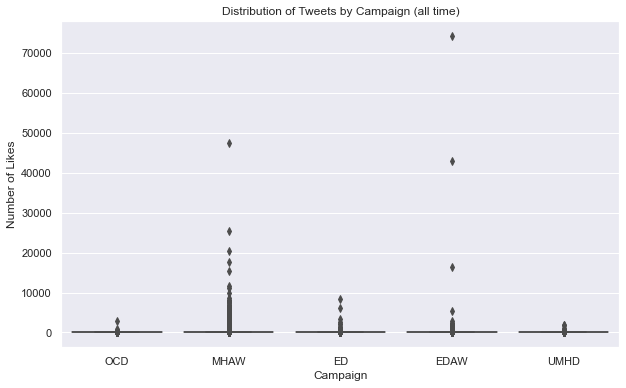

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a boxplot to look at distribution of Likes campaign
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='campaign', y='num_of_likes', data=df)
ax.set_title('Distribution of Tweets by Campaign (all time)')
ax.set_xlabel('Campaign')
ax.set_ylabel('Number of Likes')
plt.show()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          724755 non-null  object
 1   ID            724755 non-null  int64 
 2   url           724755 non-null  object
 3   username      724755 non-null  object
 4   source        724755 non-null  object
 5   location      724755 non-null  object
 6   tweet         724755 non-null  object
 7   num_of_likes  724755 non-null  int64 
 8   num_of_rt     724755 non-null  int64 
 9   followers     724755 non-null  int64 
 10  replies       724755 non-null  int64 
 11  campaign      724755 non-null  object
 12  year          724755 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 71.9+ MB


### Distribution of retweets by Campaign vs No. of likes

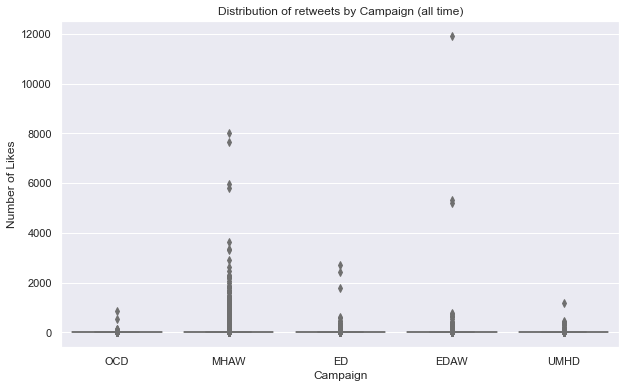

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a boxplot to look at distribution of Likes in respective to retweets campaign
sns.set_theme(style = 'darkgrid', palette='pastel')
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='campaign', y='num_of_rt', data=df)
ax.set_title('Distribution of retweets by Campaign (all time)')
ax.set_xlabel('Campaign')
ax.set_ylabel('Number of Likes')
plt.show()

### Distribution of tweets by Campaign vs No. of replies

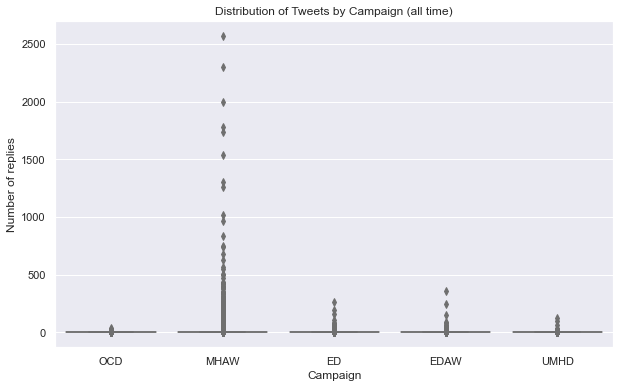

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a boxplot to look at distribution of replies campaign
sns.set_theme(style = 'darkgrid', palette='pastel')
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='campaign', y='replies', data=df)
ax.set_title('Distribution of Tweets by Campaign (all time)')
ax.set_xlabel('Campaign')
ax.set_ylabel('Number of replies')
plt.show()

In [178]:
import pandas as pd
import plotly.express as px

# Filter the dataframe to include only ED and EDAW campaigns
df_ed = df[df['campaign'].isin(['ED', 'EDAW'])]

# Convert the date column to datetime format
df_ed['Date'] = pd.to_datetime(df_ed['Date'])

# Group the tweets by week and count the number of tweets per month
df_count = df_ed.groupby(['campaign', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='count')

# Create an interactive line plot using plotly
fig = px.line(df_count, x='Date', y='count', color='campaign', 
              title='Number of Tweets per Week about Eating Disorders, compared to EDAW-acknowledged posts',
              color_discrete_sequence=['#71C4C0', '#953D8C'], 
              labels={'campaign': 'Campaign', 'count': 'Number of Tweets'})
fig.update_layout(
    xaxis=dict(title='Time Period (Grouped by Month)'),
    yaxis=dict(title='Number of Tweets'),
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5
)
fig.show()

C:\Users\aryan\AppData\Local\Temp/ipykernel_5956/118169517.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
MHAW=df[df['campaign']=='MHAW']

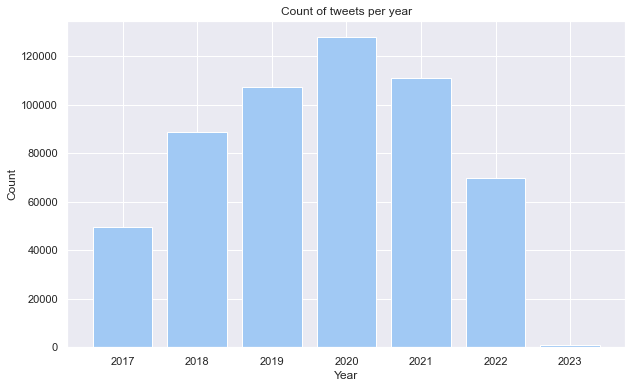

In [180]:
# group the dataframe by year, and count the number of tweets for each year
grouped = MHAW.groupby('year').size()

# create a new dataframe with the counts
df_count = pd.DataFrame({'year': grouped.index, 'count': grouped.values})

# plot the count of tweets for each year in a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_count['year'], df_count['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of tweets per year')
plt.show()

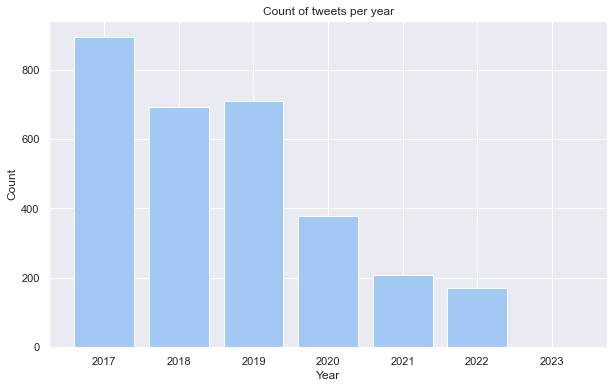

In [181]:
OCD=df[df['campaign']=='OCD']

# group the dataframe by year, and count the number of tweets for each year
grouped = OCD.groupby('year').size()

# create a new dataframe with the counts
df_count = pd.DataFrame({'year': grouped.index, 'count': grouped.values})

# plot the count of tweets for each year in a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_count['year'], df_count['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of tweets per year')
plt.show()

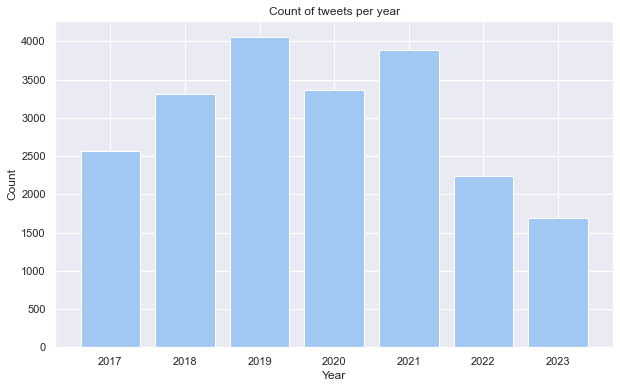

In [182]:
UMHD=df[df['campaign']=='UMHD']

grouped = UMHD.groupby('year').size()

# create a new dataframe with the counts
df_count = pd.DataFrame({'year': grouped.index, 'count': grouped.values})

# plot the count of tweets for each year in a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_count['year'], df_count['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of tweets per year')
plt.show()

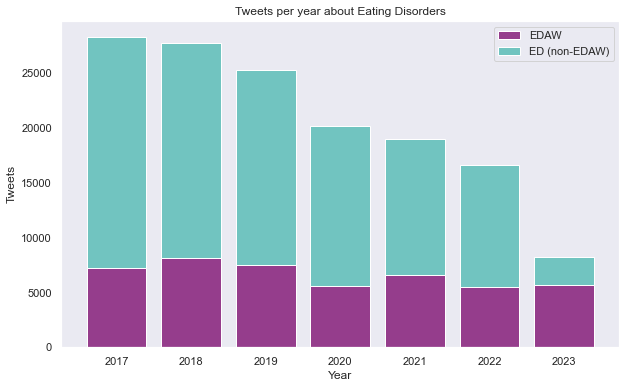

In [184]:
EDAW = df[df['campaign'] == 'EDAW']
ED = df[df['campaign'] == 'ED']

# Define colors for the bars
color_EDAW = '#953D8C'
color_ED = '#71C4C0'

# Group the EDAW and ED dataframes by year, and count the number of tweets for each year
grouped_EDAW = EDAW.groupby('year').size()
grouped_ED = ED.groupby('year').size()

# Create new dataframes with the counts
df_count_EDAW = pd.DataFrame({'year': grouped_EDAW.index, 'count_EDAW': grouped_EDAW.values})
df_count_ED = pd.DataFrame({'year': grouped_ED.index, 'count_ED': grouped_ED.values})

# Merge the two dataframes on the 'year' column
merged_df = pd.merge(df_count_EDAW, df_count_ED, on='year', how='outer')

# Sort the merged dataframe by year
merged_df.sort_values(by='year', inplace=True)

# Plot the count of tweets for each year in a stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(merged_df['year'], merged_df['count_EDAW'], label='EDAW', color=color_EDAW)
plt.bar(merged_df['year'], merged_df['count_ED'], bottom=merged_df['count_EDAW'], label='ED (non-EDAW)', color=color_ED)
plt.xlabel('Year')
plt.ylabel('Tweets')
plt.title('Tweets per year about Eating Disorders')
plt.legend()
# Remove grid lines
plt.grid(False)
plt.show()

In [189]:
import pandas as pd
import plotly.express as px

# Group the data by year and campaign, and count the number of tweets for each group
grouped = df.groupby(['year', 'campaign']).size().reset_index(name='count')

# Calculate the total number of tweets per campaign
total_tweets = grouped.groupby('campaign')['count'].sum().reset_index(name='total')

# Merge the total_tweets dataframe with the grouped dataframe to add the total number of tweets per campaign to each row
grouped = pd.merge(grouped, total_tweets, on='campaign')

# Calculate the percentage of tweets each year as a percentage of the campaign's own total number of tweets
grouped['percent'] = grouped['count'] / grouped['total'] * 100

# Filter out the year 2023 and the "ED (non-EDAW)" campaign
grouped = grouped[(grouped['year'] != 2023) & (grouped['campaign'] != 'ED (non-EDAW)')]

# Create the interactive line plot with Plotly Express
fig = px.bar(grouped, x='year', y='percent', color='campaign')

# Set the axis labels and title
fig.update_xaxes(title='Year')
fig.update_yaxes(title='% of tweets')
fig.update_layout(title='Percentage of tweets per year for EDAW and Other campaigns')

# Show the plot
fig.show()